# Airline Sentiment Analysis

## Table of Contents:
* [Data Collection](#DataCollection)
* [Data Wrangling](#DataWrangling)
* [EDA](#EDA)
    * [Airline Sentiment EDA](#airlineSentimentEDA)
    * [Airline EDA](#airlineEDA)
    * [Predictive Words](#pw)
    * [Predictive Words by Airline](#pwa)
    * [Date vs Airline Sentiment](#Date)
    * [User Timezone](#user_timezone)
* [Conclusion](#Conclusion) 

In [161]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#this will deal with punctuation
import string
#TOKENIZATTION
import re
#STOPWORDS
#from nltk.corpus import stopwords 
#import nltk
#LEMMATIZING
from nltk.stem import WordNetLemmatizer
from emoji import UNICODE_EMOJI
import emoji
from string import digits

import nltk #using the Natural Language Toolkit
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 1. Data Collection <a class="anchor" id="DataCollection"></a>

In [176]:
#get data
tweets = pd.read_csv("../Data/Tweets.csv")

## Proportion of Uppercase Text in Tweet

In [177]:
def wordUpper(text):
    return sum(map(str.isupper, text)) / len(text)

tweets["uppercase"] = tweets["text"].apply(lambda x: wordUpper(x))

tweets.head(3)

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513  neutral           1.0000                         
1  570301130888122368  positive          0.3486                         
2  570301083672813571  neutral           0.6837                         

  negativereason  negativereason_confidence         airline  \
0  NaN           NaN                         Virgin America   
1  NaN            0.0                        Virgin America   
2  NaN           NaN                         Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0  NaN                    cairdin     NaN                 0               
1  NaN                    jnardino    NaN                 0               
2  NaN                    yvonnalynn  NaN                 0               

                                                                       text  \
0  @VirginAmerica What @dhepburn said.                                        
1  @VirginAmerica plus you've added commercials to the experience... tacky.   
2  @VirginAmerica I didn't today... Must mean I need to take another trip!    

  tweet_coord              tweet_created tweet_location  \
0  NaN         2015-02-24 11:35:52 -0800  NaN             
1  NaN         2015-02-24 11:15:59 -0800  NaN             
2  NaN         2015-02-24 11:15:48 -0800  Lets Play       

                user_timezone  uppercase  
0  Eastern Time (US & Canada)  0.085714   
1  Pacific Time (US & Canada)  0.027778   
2  Central Time (US & Canada)  0.070423

## Check if text has emoji

In [202]:
#is_emoji("😘")

def checkEmoji(text):
    """for character in text:
        if character in emoji.UNICODE_EMOJI:
            return True
   
    return False"""
    has_emoji = bool(emoji.get_emoji_regexp().search(text))
    return has_emoji
    

tweets["emoji"] = tweets["text"].apply(lambda x: checkEmoji(x))

tweets.head(3)

/var/folders/4s/dkl5yc9543jbyd5lrgf388vh0000gp/T/ipykernel_73335/1737344709.py:9: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  has_emoji = bool(emoji.get_emoji_regexp().search(text))


tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513  neutral           1.0000                         
1  570301130888122368  positive          0.3486                         
2  570301083672813571  neutral           0.6837                         

  negativereason  negativereason_confidence         airline  \
0  NaN           NaN                         Virgin America   
1  NaN            0.0                        Virgin America   
2  NaN           NaN                         Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0  NaN                    cairdin     NaN                 0               
1  NaN                    jnardino    NaN                 0               
2  NaN                    yvonnalynn  NaN                 0               

                                                                       text  \
0  @VirginAmerica What @dhepburn said.                                        
1  @VirginAmerica plus you've added commercials to the experience... tacky.   
2  @VirginAmerica I didn't today... Must mean I need to take another trip!    

  tweet_coord              tweet_created tweet_location  \
0  NaN         2015-02-24 11:35:52 -0800  NaN             
1  NaN         2015-02-24 11:15:59 -0800  NaN             
2  NaN         2015-02-24 11:15:48 -0800  Lets Play       

                user_timezone  uppercase  emoji  emoji2  
0  Eastern Time (US & Canada)  0.085714   False  False   
1  Pacific Time (US & Canada)  0.027778   False  False   
2  Central Time (US & Canada)  0.070423   False  False

# 2. Data Wrangling <a class="anchor" id="DataWrangling"></a>

The following needs to be done to preprocess the data:

1. Make text lowercase
2. Removing punctuations, URLs, names
3. Tokenization
4. Removing stopwords ("this", "is", etc.)
4. Lemmatizing

In [163]:
#tweets[(tweets["negativereason"] == "Late Flight") & (tweets["airline"] == "United")]

tweet_id airline_sentiment  airline_sentiment_confidence  \
507   570307026263384064  negative          1.0                            
539   570289777184002048  negative          1.0                            
557   570280548922499073  negative          1.0                            
560   570277667519332353  negative          1.0                            
575   570271644473622528  negative          1.0                            
...                  ...       ...          ...                            
4311  567703258425081857  negative          1.0                            
4314  567676400933416960  negative          1.0                            
4322  567595670463205376  negative          1.0                            
4324  567592368451248130  negative          1.0                            
4325  567591480085463040  negative          1.0                            

     negativereason  negativereason_confidence airline airline_sentiment_gold  \
507   Late Flight    1.0000                     United  NaN                     
539   Late Flight    0.6624                     United  NaN                     
557   Late Flight    0.6383                     United  NaN                     
560   Late Flight    0.6542                     United  NaN                     
575   Late Flight    1.0000                     United  NaN                     
...           ...       ...                        ...  ...                     
4311  Late Flight    0.7073                     United  NaN                     
4314  Late Flight    0.7098                     United  NaN                     
4322  Late Flight    1.0000                     United  NaN                     
4324  Late Flight    1.0000                     United  NaN                     
4325  Late Flight    0.3460                     United  NaN                     

                 name negativereason_gold  retweet_count  \
507   lsalazarll       NaN                 0               
539   BocheBillions    NaN                 0               
557   kevinfla3        NaN                 0               
560   cristobalwong    NaN                 0               
575   fuchsialipstick  NaN                 0               
...               ...  ...                ..               
4311  wackydunks       NaN                 0               
4314  MiKasuga         NaN                 0               
4322  CRomerDome       NaN                 0               
4324  brenduch         NaN                 0               
4325  CPoutloud        NaN                 0               

                                                                                                                                                        text  \
507   @united Delayed due to lack of crew and now delayed again because there's a long line for deicing... Still need to improve service #united               
539   @united See? We were told repeatedly that the pilot was Late Flight and kept getting Late Flightr.  After we boarded, there was a defibrillator issue.   
557   @United well sitting on the ground 'on time' but waiting for a gate....again #tiredofthis                                                                
560   @united A measly $50 e-certificate is not how you appreciate loyal customers after they wait 3hrs on the tarmac during UA1116. #unacceptable             
575   @united in addition, my first flight was delayed an hour and I'm arriving at my destination 8 hrs Late Flight.                                           
...                                                                                                              ...                                           
4311  .@united call my work and tell them it's your fault I'm Late Flight                                                                                      
4314  @United is officially the worst, most delayed, and least helpful airline I have ever had the misfortune of flying on       

In [164]:
#drop columns of >= 90% null values
tweets = tweets.drop(columns=["airline_sentiment_gold" , "negativereason_gold", "tweet_coord"])

In [165]:
#Lowercase
#tweets["text"] = tweets["text"].str.lower()
#tweets["text"] = tweets["text"].apply(lambda x: x.lower())
tweets["text"] =[x.lower() for x in tweets.text]
#texts = [[word.lower() for word in text.split()] for text in data]

#remove numbers
tweets["text"] = tweets["text"].str.replace('\d+', '', regex=True)

##REMOVE PUNCTUATIONS
def remove_punc(text):
    words_wo_punct = re.sub(r"[^A-Za-z0-9\s]+", "", text)
    return words_wo_punct

tweets["text"] = tweets["text"].apply(lambda x: remove_punc(x))

In [166]:
#REMOVE WHITESPACE
tweets["text"] = tweets["text"].str.strip()

#remove emoji
tweets["text"] = tweets["text"].apply(lambda x: emoji.demojize(x))
tweets["text"].head()

0    virginamerica what dhepburn said                                                                                       
1    virginamerica plus youve added commercials to the experience tacky                                                     
2    virginamerica i didnt today must mean i need to take another trip                                                      
3    virginamerica its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4    virginamerica and its a really big bad thing about it                                                                  
Name: text, dtype: object

In [167]:
#LEMMATIZING
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    word_list = nltk.word_tokenize(text)
    lem_text = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lem_text

tweets["text"] = tweets["text"].apply(lambda x: word_lemmatizer(x))
tweets.text.head()

0    virginamerica what dhepburn said                                                                                    
1    virginamerica plus youve added commercial to the experience tacky                                                   
2    virginamerica i didnt today must mean i need to take another trip                                                   
3    virginamerica it really aggressive to blast obnoxious entertainment in your guest face amp they have little recourse
4    virginamerica and it a really big bad thing about it                                                                
Name: text, dtype: object

In [168]:
#REMOVE STOPWORDS and tokenize
def remove_stopwords(text):
    tokens = word_tokenize(text)
    english_stopwords = stopwords.words('english')
    tokens_wo_stopwords = [t for t in tokens if t not in english_stopwords]
    
    return tokens_wo_stopwords

tweets["text"] = tweets["text"].apply(lambda x: remove_stopwords(str(x)))
tweets["text"].head()

0    [virginamerica, dhepburn, said]                                                                         
1    [virginamerica, plus, youve, added, commercial, experience, tacky]                                      
2    [virginamerica, didnt, today, must, mean, need, take, another, trip]                                    
3    [virginamerica, really, aggressive, blast, obnoxious, entertainment, guest, face, amp, little, recourse]
4    [virginamerica, really, big, bad, thing]                                                                
Name: text, dtype: object

# 3. EDA <a class="anchor" id="EDA"></a>

## View distribution of sentiment

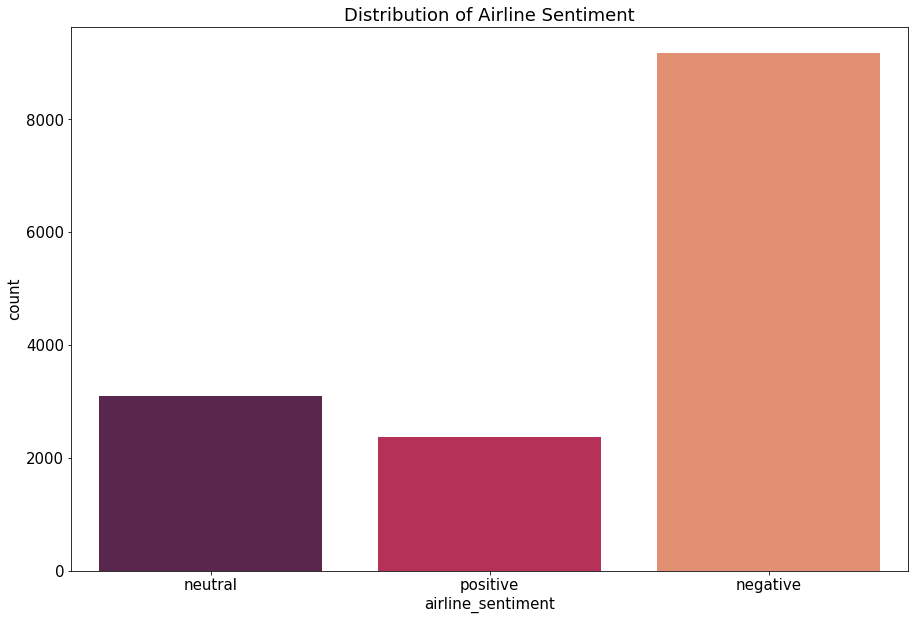

In [169]:
figure, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x = tweets["airline_sentiment"], palette='rocket').set(title="Distribution of Airline Sentiment")

#### View the polarity of a tweet 

In [170]:
from textblob import TextBlob, Word, Blobber
tweets['polarity']=tweets['text'].map(lambda text: TextBlob(str(text)).sentiment.polarity)
tweets.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513  neutral           1.0000                         
1  570301130888122368  positive          0.3486                         
2  570301083672813571  neutral           0.6837                         
3  570301031407624196  negative          1.0000                         
4  570300817074462722  negative          1.0000                         

  negativereason  negativereason_confidence         airline        name  \
0  NaN           NaN                         Virgin America  cairdin      
1  NaN            0.0000                     Virgin America  jnardino     
2  NaN           NaN                         Virgin America  yvonnalynn   
3  Bad Flight     0.7033                     Virgin America  jnardino     
4  Can't Tell     1.0000                     Virgin America  jnardino     

   retweet_count  \
0  0               
1  0               
2  0               
3  0               
4  0               

                                                                                                       text  \
0  [virginamerica, dhepburn, said]                                                                            
1  [virginamerica, plus, youve, added, commercial, experience, tacky]                                         
2  [virginamerica, didnt, today, must, mean, need, take, another, trip]                                       
3  [virginamerica, really, aggressive, blast, obnoxious, entertainment, guest, face, amp, little, recourse]   
4  [virginamerica, really, big, bad, thing]                                                                   

               tweet_created tweet_location               user_timezone  \
0  2015-02-24 11:35:52 -0800  NaN            Eastern Time (US & Canada)   
1  2015-02-24 11:15:59 -0800  NaN            Pacific Time (US & Canada)   
2  2015-02-24 11:15:48 -0800  Lets Play      Central Time (US & Canada)   
3  2015-02-24 11:15:36 -0800  NaN            Pacific Time (US & Canada)   
4  2015-02-24 11:14:45 -0800  NaN            Pacific Time (US & Canada)   

   polarity  
0  0.00000   
1  0.00000   
2 -0.31250   
3  0.00625   
4 -0.35000

#### View the distribution of the polarity of the tweet

Text(0.5, 1.0, 'Distibution of polarity')

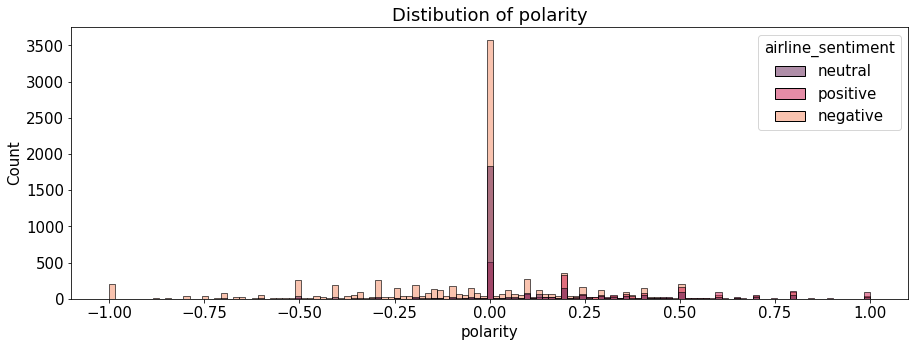

In [171]:
fig, axes = plt.subplots(figsize=(15, 5))
axes = sns.histplot(x = tweets["polarity"], palette="rocket", hue=tweets["airline_sentiment"])

plt.title("Distibution of polarity")

Let's look at the length of text

Text(0.5, 1.0, 'Distibution of text length')

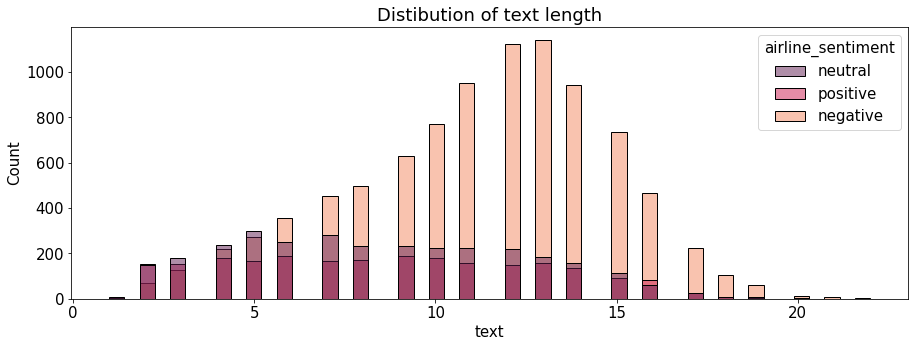

In [172]:
fig, axes = plt.subplots(figsize=(15, 5))
textLen = tweets["text"].apply(lambda x: len(x))
axes = sns.histplot(x = textLen, palette="rocket", hue=tweets["airline_sentiment"], bins=50)

plt.title("Distibution of text length")

## Uppercase of text

### Word count

### Let's visualize this

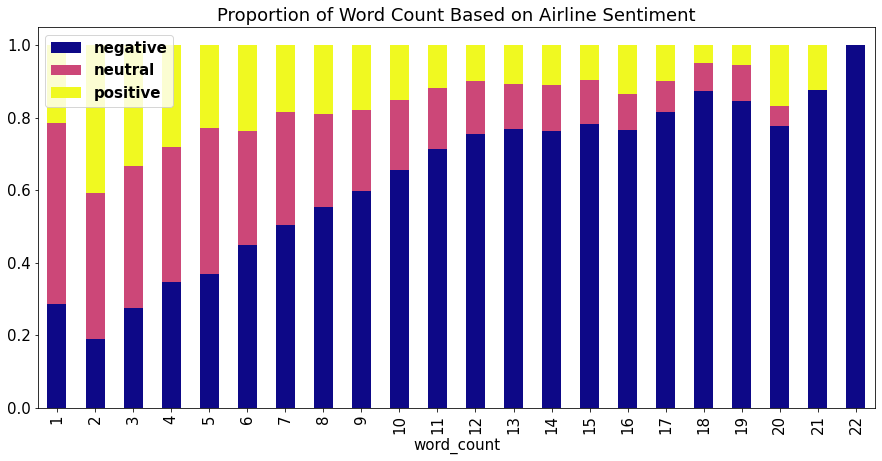

In [174]:
from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"] = (15,7)
plt.rcParams.update({'font.size': 15})
plt.rc('legend', fontsize=15)

#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


tweets.groupby('word_count')['airline_sentiment'].value_counts(
    normalize=True).unstack('airline_sentiment').plot.bar(stacked=True, cmap="plasma")
plt.title("Proportion of Word Count Based on Airline Sentiment")

plt.legend(loc="upper right")
legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties)

plt.show()

The negative sentiment has more words in the tweet

## Check the percentage of text that are uppercase

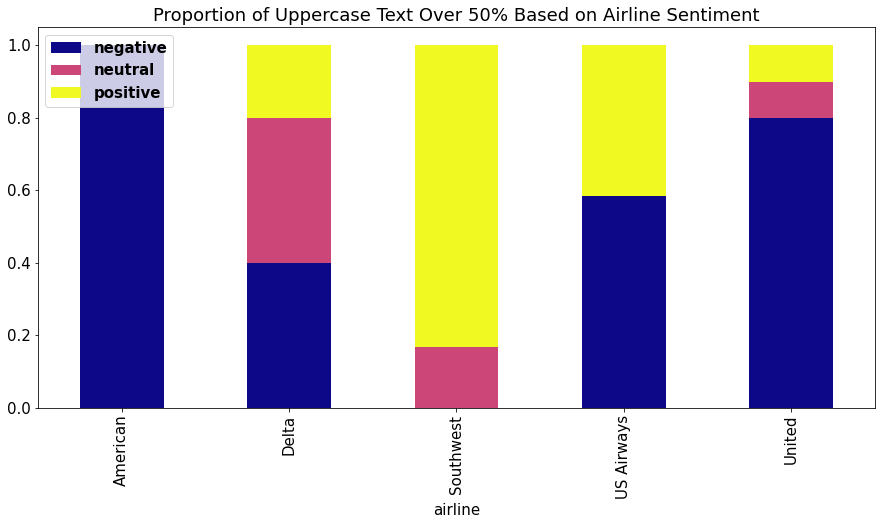

In [182]:
df = tweets[tweets["uppercase"] > 0.50]

df.groupby('airline')['airline_sentiment'].value_counts(
    normalize=True).unstack('airline_sentiment').plot.bar(stacked=True, cmap="plasma")
plt.title("Proportion of Uppercase Text Over 50% Based on Airline Sentiment")

plt.legend(loc="upper right")
legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties)

plt.show()

## Check the proportion of tweets with an emoji in text

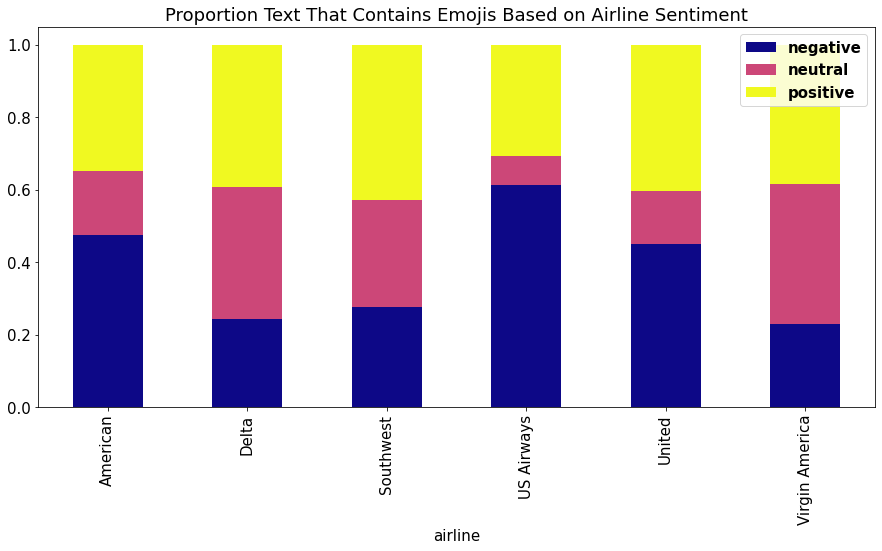

In [206]:
df = tweets[tweets["emoji"] == True]

df.groupby('airline')['airline_sentiment'].value_counts(
    normalize=True).unstack('airline_sentiment').plot.bar(stacked=True, cmap="plasma")
plt.title("Proportion Text That Contains Emojis Based on Airline Sentiment")

plt.legend(loc="upper right")
legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties)

plt.show()

### Does not contain emojis

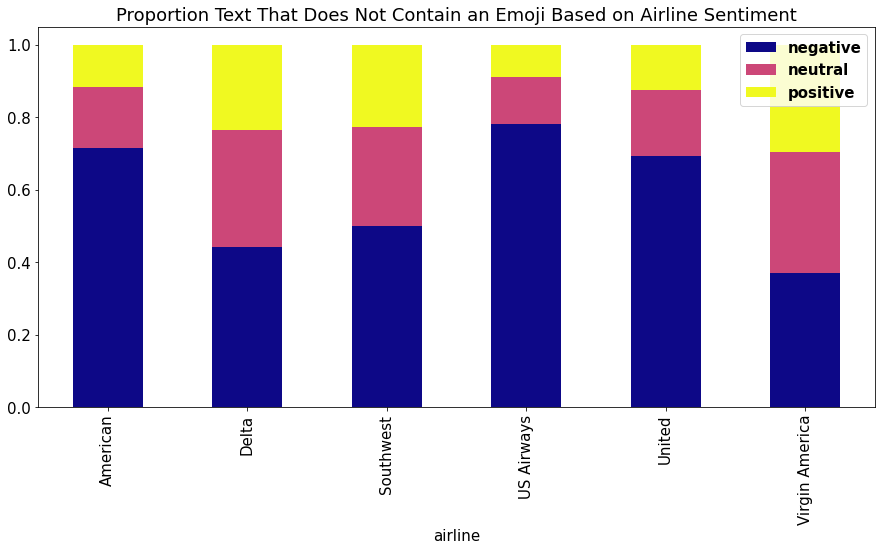

In [204]:
df = tweets[tweets["emoji"] == False]

df.groupby('airline')['airline_sentiment'].value_counts(
    normalize=True).unstack('airline_sentiment').plot.bar(stacked=True, cmap="plasma")
plt.title("Proportion Text That Does Not Contain an Emoji Based on Airline Sentiment")

plt.legend(loc="upper right")
legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties)

plt.show()

### EDA based on airline sentiment <a class="anchor" id="airlineSentimentEDA"></a>

#### View distribution of airline_sentiment_confidence

Text(0.5, 1.0, 'Airline Sentiment Confidence Distributions')

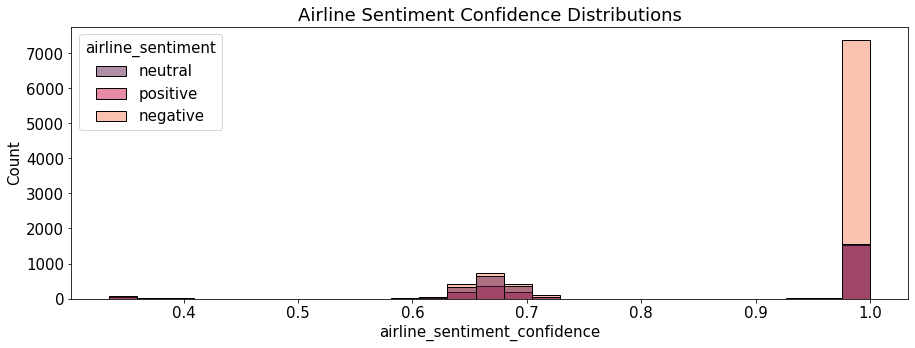

In [18]:
fig, axes = plt.subplots(figsize=(15, 5))
#sns.set_style("whitegrid")
axes = sns.histplot(tweets, x="airline_sentiment_confidence", hue="airline_sentiment", palette="rocket")
plt.title("Airline Sentiment Confidence Distributions")

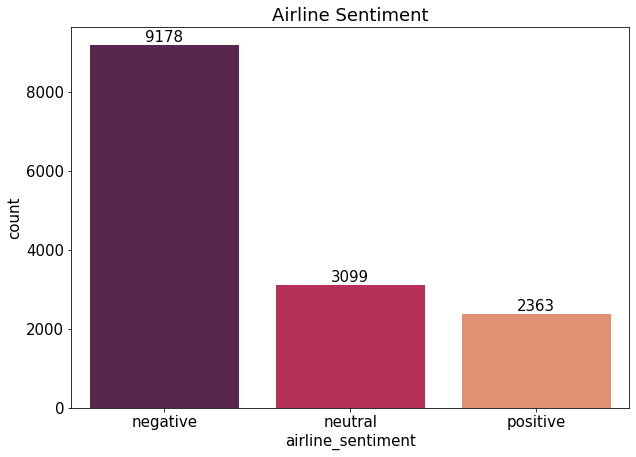

In [19]:
#see the difference between views
fig, axes = plt.subplots(figsize=(10, 7))
axes = sns.countplot(x="airline_sentiment", data=tweets, palette="rocket", order= tweets["airline_sentiment"].value_counts().index)

#sns.set_style("whitegrid")
plt.title("Airline Sentiment")

for container in axes.containers:
    axes.bar_label(container)

Text(0.5, 1.0, 'Airline Sentiment Proportion')

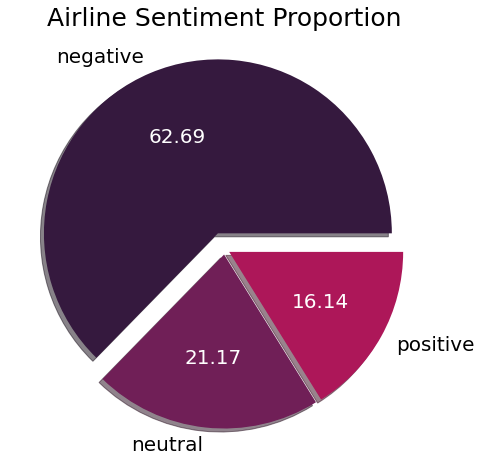

In [20]:
colors= sns.color_palette('rocket')
al = tweets["airline_sentiment"].value_counts()
myexplode = [0.10, 0.03, 0.03]

pie, ax = plt.subplots(figsize=[20,8])
_, _, autotexts = plt.pie(al, labels = al.keys(), colors=colors, autopct="%.2f", 
                          explode = myexplode, shadow=True, textprops={'fontsize': 20})

for ins in autotexts:
    ins.set_color('white')

plt.title("Airline Sentiment Proportion", fontsize=25)

In [21]:
from matplotlib import style
  
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Most of the sentiment is negative.

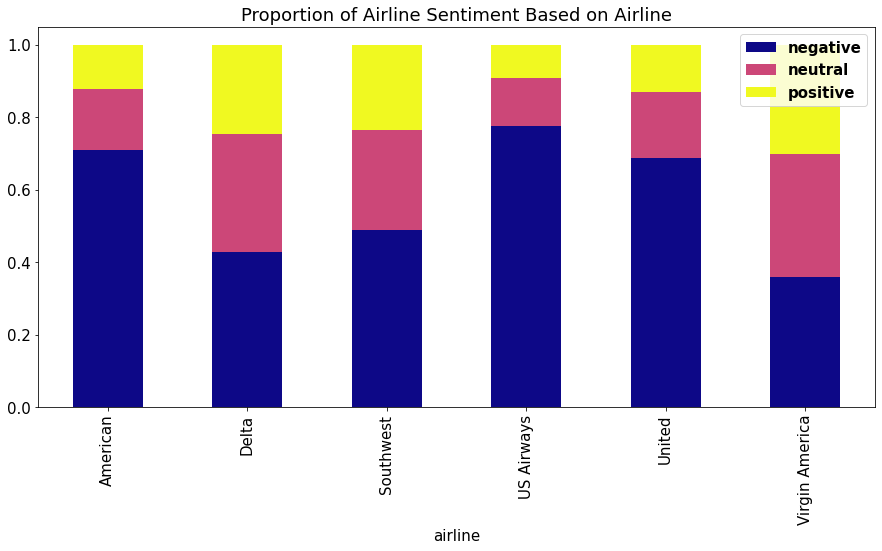

In [22]:
plt.rcParams["figure.figsize"] = (15,7)
plt.rcParams.update({'font.size': 15})

#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
tweets.groupby('airline')['airline_sentiment'].value_counts(
    normalize=True).unstack('airline_sentiment').plot.bar(stacked=True, cmap="plasma")
plt.title("Proportion of Airline Sentiment Based on Airline")

plt.legend(loc="upper right")
legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties)

plt.show()

Text(0.5, 1.0, 'Airlines')

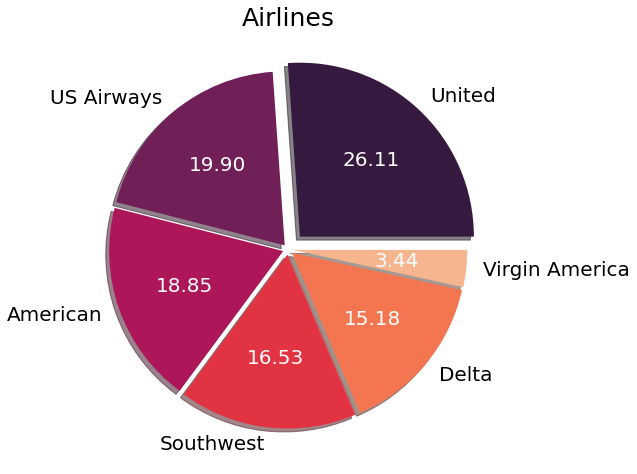

In [23]:
colors= sns.color_palette('rocket')
al = tweets["airline"].value_counts()
myexplode = [0.10, 0.03, 0.03, 0.03, 0.03, 0.03]
#sns.set_style("white")

pie, ax = plt.subplots(figsize=[20,8])
_, _, autotexts = plt.pie(al, labels = al.keys(), colors=colors, autopct="%.2f", 
                          explode = myexplode, shadow=True, textprops={'fontsize': 20})

for ins in autotexts:
    ins.set_color('white')

plt.title("Airlines", fontsize=25)

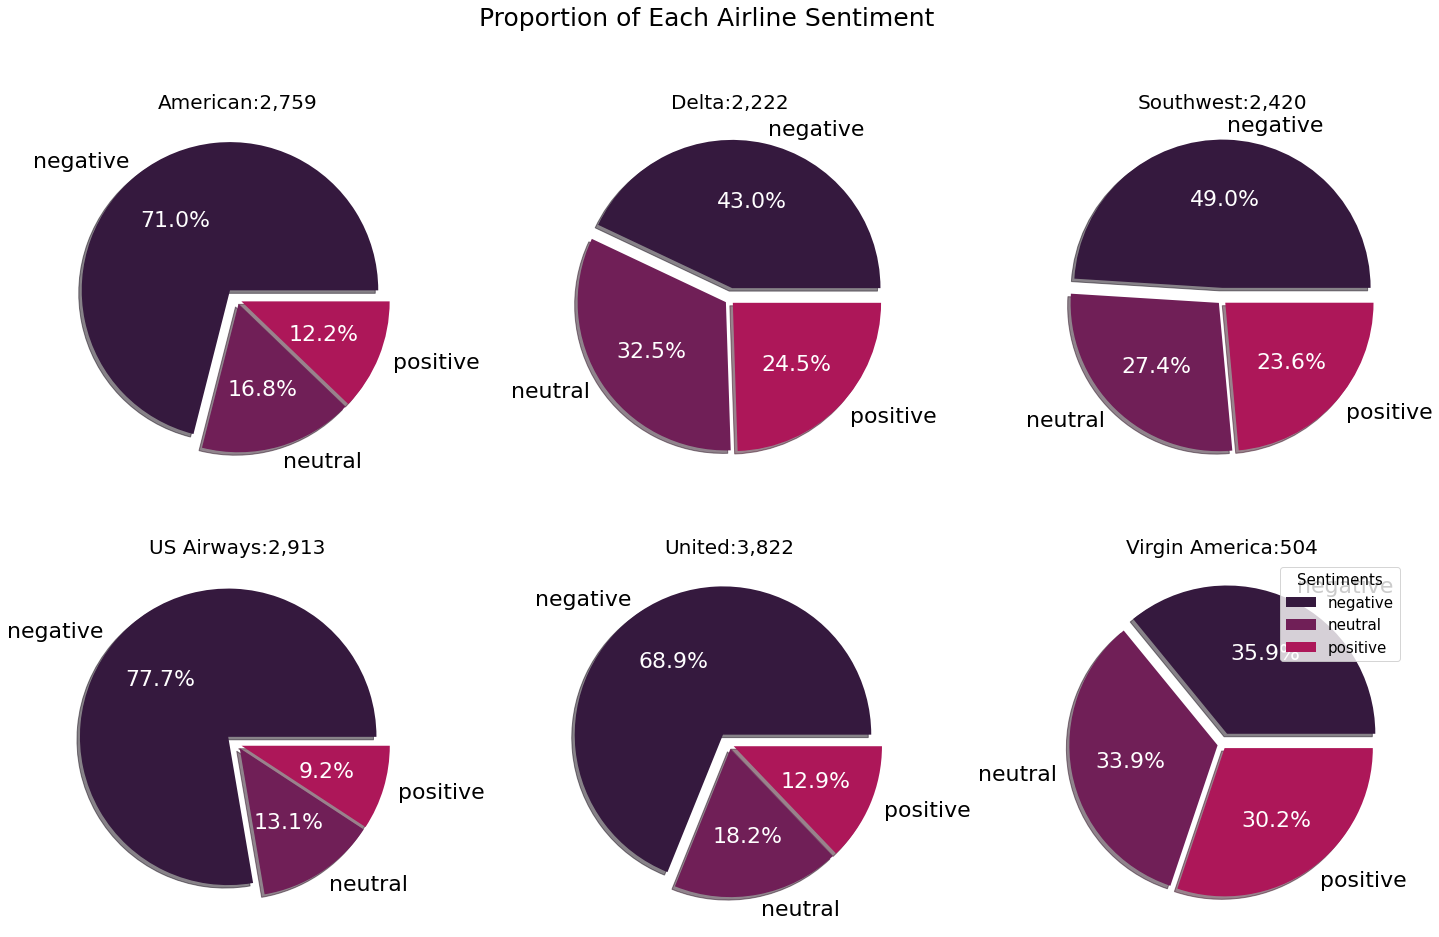

In [24]:
airlines = tweets.groupby(["airline", "airline_sentiment"])["airline_sentiment"].count().unstack()
colors= sns.color_palette('rocket')
myexplode = [0.08, 0.03, 0.03]
#sns.set_style("white")

fig, axes = plt.subplots(2, 3, figsize=(25, 15))
axes = axes.flatten()

for i, ax in zip(range(0, 6), axes):
    temp = airlines.iloc[i]
    #plt.rcParams.update({'font.size': 20})
    _, _, autotexts = ax.pie(x=temp, labels = temp.index, autopct="%.1f%%", colors=colors, 
           explode = myexplode, shadow = True, textprops={'fontsize': 22})
    ax.set_title(f"{airlines.index[i]}:{format(airlines.values[i].sum(),',')}", fontsize=20)
    for ins in autotexts:
        ins.set_color('white')
    
    
    
plt.suptitle("Proportion of Each Airline Sentiment", fontsize = 25)    
plt.legend(title = "Sentiments")
plt.show()

### View the amount of retweets in the tweet

In [25]:
#get the top and lowest tweet with retweet
print("The max retweets are: " + str(max(tweets["retweet_count"])))
print("The min retweets are: " + str(min(tweets["retweet_count"])))

The max retweets are: 44
The min retweets are: 0


In [26]:
tweets.sort_values("retweet_count", ascending="False" ).head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0     570306133677760513           neutral                           1.0   
9681  569720701197750272          negative                           1.0   
9682  569719964023853056          negative                           1.0   
9683  569719741906075648          negative                           1.0   
9684  569719242427396096          negative                           1.0   

              negativereason  negativereason_confidence         airline  \
0                        NaN                        NaN  Virgin America   
9681              Can't Tell                     1.0000      US Airways   
9682  Customer Service Issue                     0.6643      US Airways   
9683             Late Flight                     1.0000      US Airways   
9684        Cancelled Flight                     0.6987      US Airways   

             name  retweet_count  \
0         cairdin              0   
9681      jamokee              0   
9682       MelCMP              0   
9683  RishiKumar8              0   
9684       MelCMP              0   

                                                   text  \
0                       [virginamerica, dhepburn, said]   
9681                                 [usairways, worst]   
9682  [usairways, making, folk, run, gate, c, b, exp...   
9683  [usairways, waiting, airplane, total, hour, ta...   
9684  [usairways, given, option, new, flight, cant, ...   

                  tweet_created           tweet_location  \
0     2015-02-24 11:35:52 -0800                      NaN   
9681  2015-02-22 20:49:34 -0800  Sandy Eggo, California    
9682  2015-02-22 20:46:38 -0800             Pennsylvania   
9683  2015-02-22 20:45:46 -0800                      NaN   
9684  2015-02-22 20:43:46 -0800             Pennsylvania   

                   user_timezone  polarity  word_count  
0     Eastern Time (US & Canada)  0.000000           3  
9681                      Alaska -1.000000           2  
9682  Eastern Time (US & Canada)  0.000000          14  
9683                       Quito -0.125000          11  
9684  Eastern Time (US & Canada) -0.431818          15

#### EDA based on airline <a class="anchor" id="airlineEDA"></a>

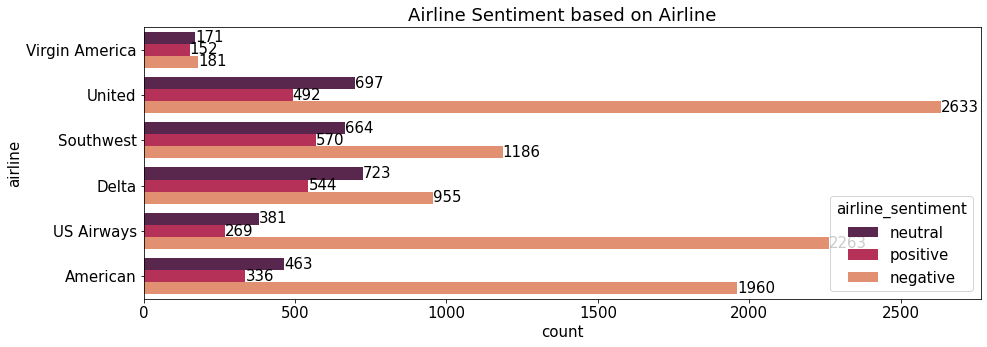

In [27]:
#sns.set_style("whitegrid")

fig, axes = plt.subplots(figsize=(15, 5))
axes = sns.countplot(y="airline", hue="airline_sentiment", data=tweets, palette="rocket")
plt.title("Airline Sentiment based on Airline")

for container in axes.containers:
    axes.bar_label(container)

# <b>Get the most predictive words by airline</b> <a class="anchor" id="pw"></a>


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

tweets["text"] = tweets["text"].astype(str)

cv = CountVectorizer(min_df=50, max_df=0.70)
X = cv.fit_transform(tweets.text)
y = tweets['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)

lr = LogisticRegression(max_iter=1000, C=1).fit(X_train, y_train)

In [29]:
words = np.array(cv.get_feature_names())

X = np.eye(X_test.shape[1])
probs = lr.predict_log_proba(X)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print("Good Words")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Bad Words")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Good Words
               thank 0.97
             booking 0.94
                  hi 0.94
              thanks 0.93
             amazing 0.92
               quick 0.92
              airway 0.91
             awesome 0.91
                best 0.91
                snow 0.90
Bad Words
                paid 0.27
          frustrated 0.27
              answer 0.26
               error 0.26
        unacceptable 0.25
             nothing 0.22
           complaint 0.21
          ridiculous 0.21
                fail 0.18
               worst 0.10


Method
Preprocess the text
Create term-document matrix with CountVectorizer
Train a predictive model on the matrix
Create an identity matrix the length of the vocabulary - so essentially we are creating a list of documents with the same vocabulary as our CountVectorizer, and each document is one word long - one for each word on the vocabulary
Use your model to predict on the identity matrix, and get a list of probabilities for each word
Connect the vocabulary to the probabilities (you can zip or use np.hstack or make a data frame with 2 columns)
Sort for most/least probable words for any give class
If words don’t make sense, experiment with min_df until they do (often min_df = 50 is good for this) 
you can just list these out, similarly to in the naive bayes assignment, you can also use the word_cloud module and use .generate_from_frequencies() method to create word clouds for most predictive and least predictive words
.generate_from_frequencies() allows you to input a dictionary rather than simply text, so you can input a dictionary with the words as the keys and their probabilities as the values

In [30]:
#make list of words
allWords = words[ind]
words = []

for w in allWords:
    w =  "{:>20}".format(w)
    words.append(w)

#words

#make list of prob
allProb = probs[ind]
probability = []

for p in allProb:
    p = "{:.2f}".format(1 - np.exp(p))
    probability.append(p)

#probability

In [31]:
predictiveWords = {"Words": words, "Probabilities": probability}

predictiveWords = pd.DataFrame(predictiveWords)
predictiveWords.head()

Words Probabilities
0                 thank          0.97
1               booking          0.94
2                    hi          0.94
3                thanks          0.93
4               amazing          0.92

In [32]:
#top predecticted words
predictiveWords[:10]

Words Probabilities
0                 thank          0.97
1               booking          0.94
2                    hi          0.94
3                thanks          0.93
4               amazing          0.92
5                 quick          0.92
6                airway          0.91
7               awesome          0.91
8                  best          0.91
9                  snow          0.90

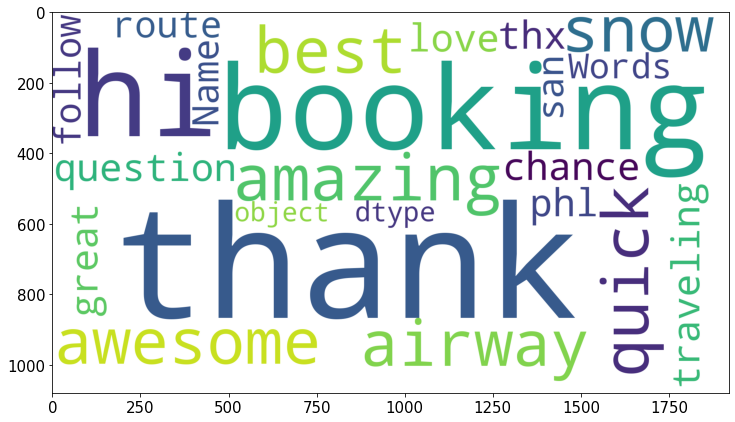

In [33]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
#sns.set_style("white")

wc = WordCloud(background_color = 'white', width = 1920, height = 1080)
cloud = wc.generate_from_text(str(predictiveWords[:20].Words))
plt.imshow(cloud)
plt.show()

In [34]:
#bottom predecticted words
predictiveWords[-10:]

Words Probabilities
467                  paid          0.27
468            frustrated          0.27
469                answer          0.26
470                 error          0.26
471          unacceptable          0.25
472               nothing          0.22
473             complaint          0.21
474            ridiculous          0.21
475                  fail          0.18
476                 worst          0.10

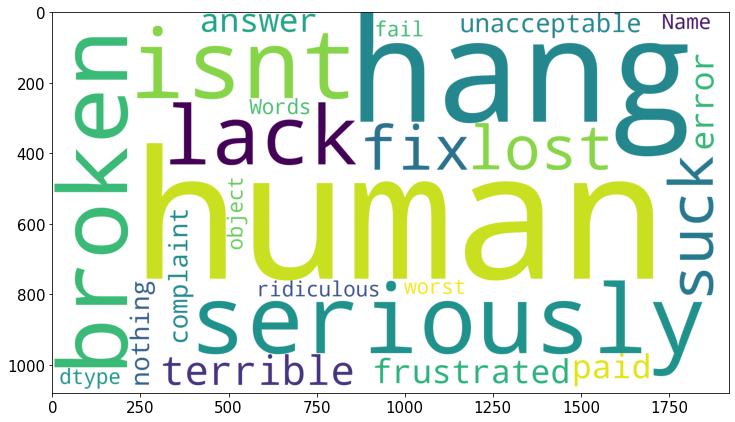

In [35]:
#sns.set_style("white")
wc = WordCloud(background_color = 'white', width = 1920, height = 1080)
cloud = wc.generate_from_text(str(predictiveWords[-20:].Words))
plt.imshow(cloud)
plt.show()

# Changing min_df to 75

In [36]:
tweets["text"] = tweets["text"].astype(str)

cv = CountVectorizer(min_df=75, max_df=0.70)
X = cv.fit_transform(tweets.text)
y = tweets['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)
lr = LogisticRegression(max_iter=1000, C=1).fit(X_train, y_train)


words = np.array(cv.get_feature_names())

X = np.eye(X_test.shape[1])
probs = lr.predict_log_proba(X)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print("Good Words")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Bad Words")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Good Words
               thank 0.96
                  hi 0.93
             booking 0.92
              thanks 0.92
              airway 0.91
             amazing 0.91
                snow 0.90
                best 0.90
             awesome 0.89
                love 0.89
Bad Words
            terrible 0.28
                paid 0.28
                suck 0.26
                isnt 0.26
              answer 0.26
        unacceptable 0.21
             nothing 0.20
          ridiculous 0.17
                fail 0.16
               worst 0.10


# Changing min_df to 100

In [37]:
tweets["text"] = tweets["text"].astype(str)

cv = CountVectorizer(min_df=100, max_df=0.70)
X = cv.fit_transform(tweets.text)
y = tweets['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)
lr = LogisticRegression(max_iter=1000, C=1).fit(X_train, y_train)


words = np.array(cv.get_feature_names())

X = np.eye(X_test.shape[1])
probs = lr.predict_log_proba(X)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print("Good Words")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Bad Words")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Good Words
               thank 0.96
             booking 0.91
              thanks 0.91
                best 0.89
             awesome 0.89
               great 0.88
                love 0.88
                 thx 0.88
                 phl 0.85
              follow 0.84
Bad Words
               never 0.33
                lost 0.31
                  hr 0.31
             luggage 0.30
              system 0.29
              answer 0.27
                hour 0.27
                isnt 0.25
             nothing 0.19
               worst 0.09


# Predictive words based on Airlines <a class="anchor" id="pwa"></a>

In [38]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize

def bad_good_words(df, min_df = 75):
    
    
    df["text"] = df["text"].astype(str)

    cv = CountVectorizer(min_df=min_df, max_df=0.70)
    X = cv.fit_transform(df.text)
    y = df['airline_sentiment']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)
    lr = LogisticRegression(max_iter=1000, C=1).fit(X_train, y_train)


    words = np.array(cv.get_feature_names())

    X = np.eye(X_test.shape[1])
    probs = lr.predict_log_proba(X)[:, 0]
    ind = np.argsort(probs)

    good_words = words[ind[:10]]
    bad_words = words[ind[-10:]]

    good_prob = probs[ind[:10]]
    bad_prob = probs[ind[-10:]]
    
    df_good = pd.DataFrame(columns = ["good_word", "good_prob"])
    df_bad = pd.DataFrame(columns = ["bad_word", "bad_prob"])

    print("Good Words")
    for w, p in zip(good_words, good_prob):
        my_cmap = cm.get_cmap('plasma')
        my_norm = Normalize(vmin=0, vmax=8)
        print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
        df_good = df_good.append({"good_word": w, "good_prob": "{:.2f}".format(1 - np.exp(p))}, ignore_index=True)
    
    print("Bad Words")
    for w,p  in zip(bad_words, bad_prob):
        print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
        df_bad = df_bad.append({"bad_word": w, "bad_prob": "{:.2f}".format(1 - np.exp(p))}, ignore_index=True)
        
    df_good["good_prob"] = pd.to_numeric(df_good["good_prob"])
    df_bad["bad_prob"] = pd.to_numeric(df_bad["bad_prob"])
    
    #fig, axes = plt.subplots(figsize=(15, 5))
    fig, axes = plt.subplots(2, 1, figsize=(25, 15))
    
    sns.barplot(x="good_word", y="good_prob", data=df_good, palette="rocket", 
                     order = df_good.sort_values("good_prob", ascending=False).good_word,
               ax=axes[0]).set(title="Good Words and Probabilities")
    sns.barplot(x="bad_word", y="bad_prob", data=df_bad, palette="rocket", 
                     order = df_bad.sort_values("bad_prob", ascending=False).bad_word,
               ax=axes[1]).set(title="Bad Words and Probabilities")

## United

Good Words
               thank 0.88
              thanks 0.80
                  dm 0.65
                good 0.64
                 got 0.62
                 way 0.61
                need 0.59
               today 0.58
               first 0.57
                last 0.56
Bad Words
               issue 0.21
               agent 0.20
                  hr 0.20
               never 0.19
              really 0.19
           cancelled 0.18
              people 0.17
                hour 0.16
             delayed 0.15
               worst 0.07


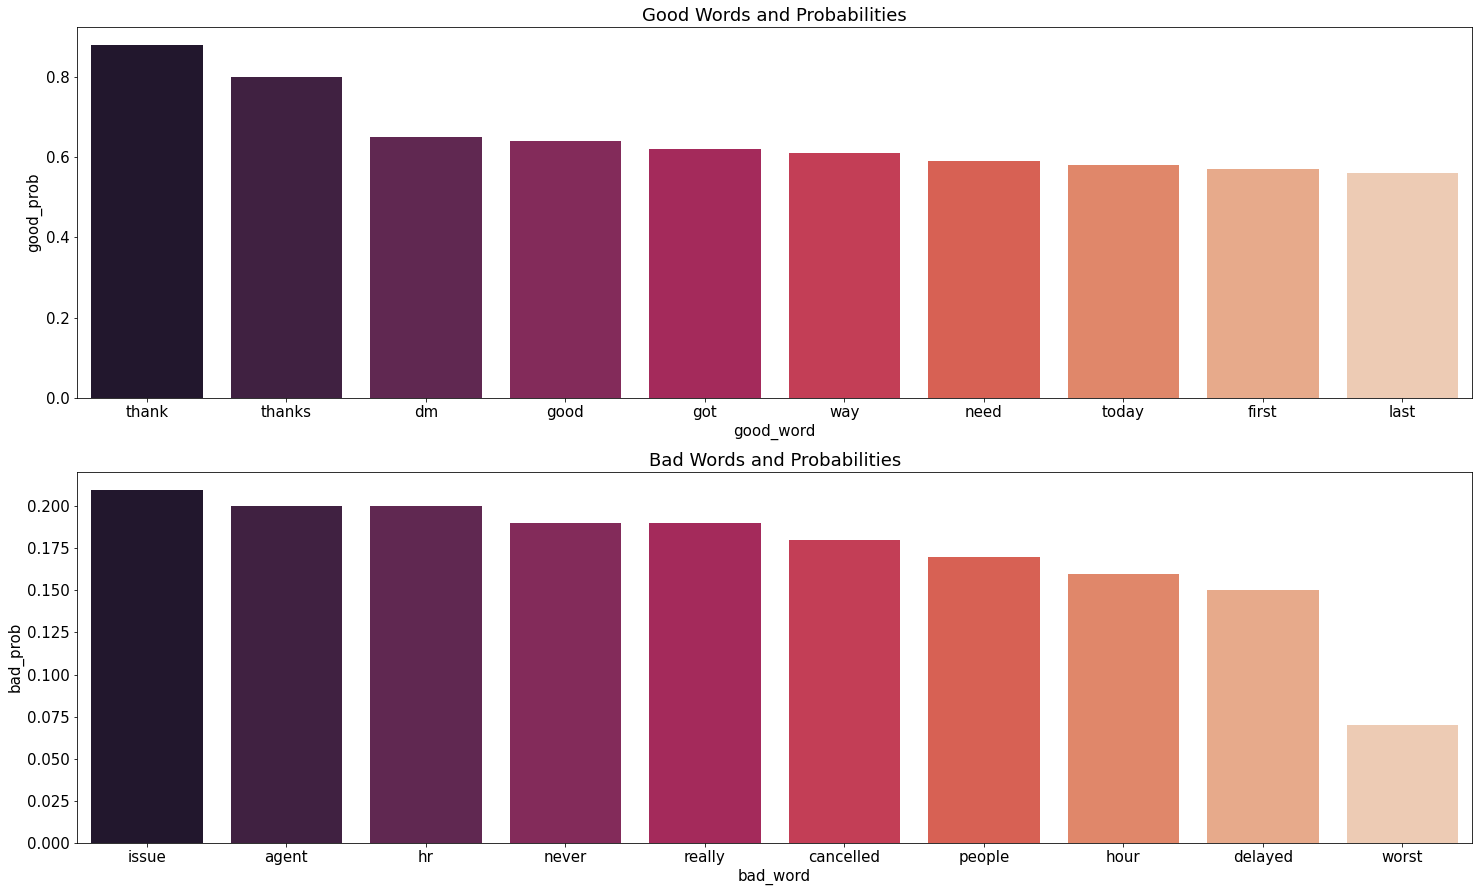

In [39]:
#United
df = tweets.copy()
df = df[df["airline"] == "United"]
bad_good_words(df)

In [92]:
#weird =  pd.read_csv("../Data/Tweets.csv")
#pd.set_option("display.max_colwidth", -1)

def getWordContext(wordList, airline):
    #specific_words = wordList

    weirdDF =  pd.read_csv("../Data/Tweets.csv")
    pd.set_option("display.max_colwidth", -1)
    weirdDF = weirdDF[weirdDF["airline"] == airline]
    
    query = '|'.join(wordList)
 
    weirdDF['query_match'] = weirdDF["text"].str.contains(query, case=False)
    weirdDF['word'] = weirdDF["text"].str.extract( '({})'.format(query) )
    
    releventTweets = weirdDF[weirdDF["query_match"] == True]

    #print(releventTweets.text.head())
    return releventTweets.head()

In [96]:
#weirdWords = ["need", "got", "way"]
weirdWords = ["way"]
getWordContext(weirdWords, "United")

/var/folders/4s/dkl5yc9543jbyd5lrgf388vh0000gp/T/ipykernel_73335/1915454056.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


tweet_id airline_sentiment  airline_sentiment_confidence  \
512  570302375510056960  neutral           0.6761                         
513  570302023993831425  negative          0.6735                         
540  570289557205327873  negative          1.0000                         
570  570272511050383360  negative          1.0000                         
584  570269035998408704  negative          0.6794                         

             negativereason  negativereason_confidence airline  \
512  NaN                     0.0000                     United   
513  Bad Flight              0.3476                     United   
540  longlines               0.6575                     United   
570  Customer Service Issue  1.0000                     United   
584  Customer Service Issue  0.3802                     United   

    airline_sentiment_gold            name negativereason_gold  retweet_count  \
512  NaN                    hmansfield      NaN                 0               
513  NaN                    slandail        NaN                 0               
540  NaN                    CoachJoette     NaN                 0               
570  NaN                    Micaela4Mizzou  NaN                 0               
584  NaN                    jkentakula      NaN                 0               

                                                                                                                                            text  \
512  @united I understand, but it's tough when there is no way to get to the airport w/o serious risk of an accident. It's a steep price.          
513  @united Gate agent hooked me up with alternate flights. If you have a way to PREVENT the constant issues, that would rock.                    
540  @united why no preferred security line anymore. My TSA pre-check didn't pull on my @SilverAirways partner flight! #Platinum #spoiled          
570  @united you guys need some serious training in customer service. Too many better options to put up with the way you guys handle ur mistakes   
584  @united as a 1k, I'm always hoping for improvement.                                                                                           

    tweet_coord              tweet_created        tweet_location  \
512  NaN         2015-02-24 11:20:56 -0800  Berkeley Heights, NJ   
513  NaN         2015-02-24 11:19:32 -0800  Columbus, Ohio         
540  NaN         2015-02-24 10:30:00 -0800  Tampa                  
570  NaN         2015-02-24 09:22:16 -0800  NaN                    
584  NaN         2015-02-24 09:08:27 -0800  NaN                    

                  user_timezone  query_match word  
512  Quito                       True         way  
513  Eastern Time (US & Canada)  True         way  
540  NaN                         True         way  
570  Hawaii                      True         way  
584  NaN                         True         way

- need > "@VirginAmerica I didn't today... Must mean I need to take another trip!" 
- got > "@VirginAmerica:You've met your match.Got status on another airline? Upgrade : http://t.co/H952rDKTqy"
- way > "@VirginAmerica Moodlighting is the only way to fly! Best experience EVER! Cool and calming."

## American

Good Words
               thank 0.94
              thanks 0.83
                 dfw 0.57
                like 0.56
            tomorrow 0.54
              change 0.52
               today 0.52
                 got 0.48
              please 0.46
                need 0.44
Bad Words
           cancelled 0.25
                  ha 0.22
                dont 0.20
                call 0.19
                 day 0.16
                 bag 0.16
                hour 0.16
            customer 0.16
                hold 0.14
                  hr 0.10


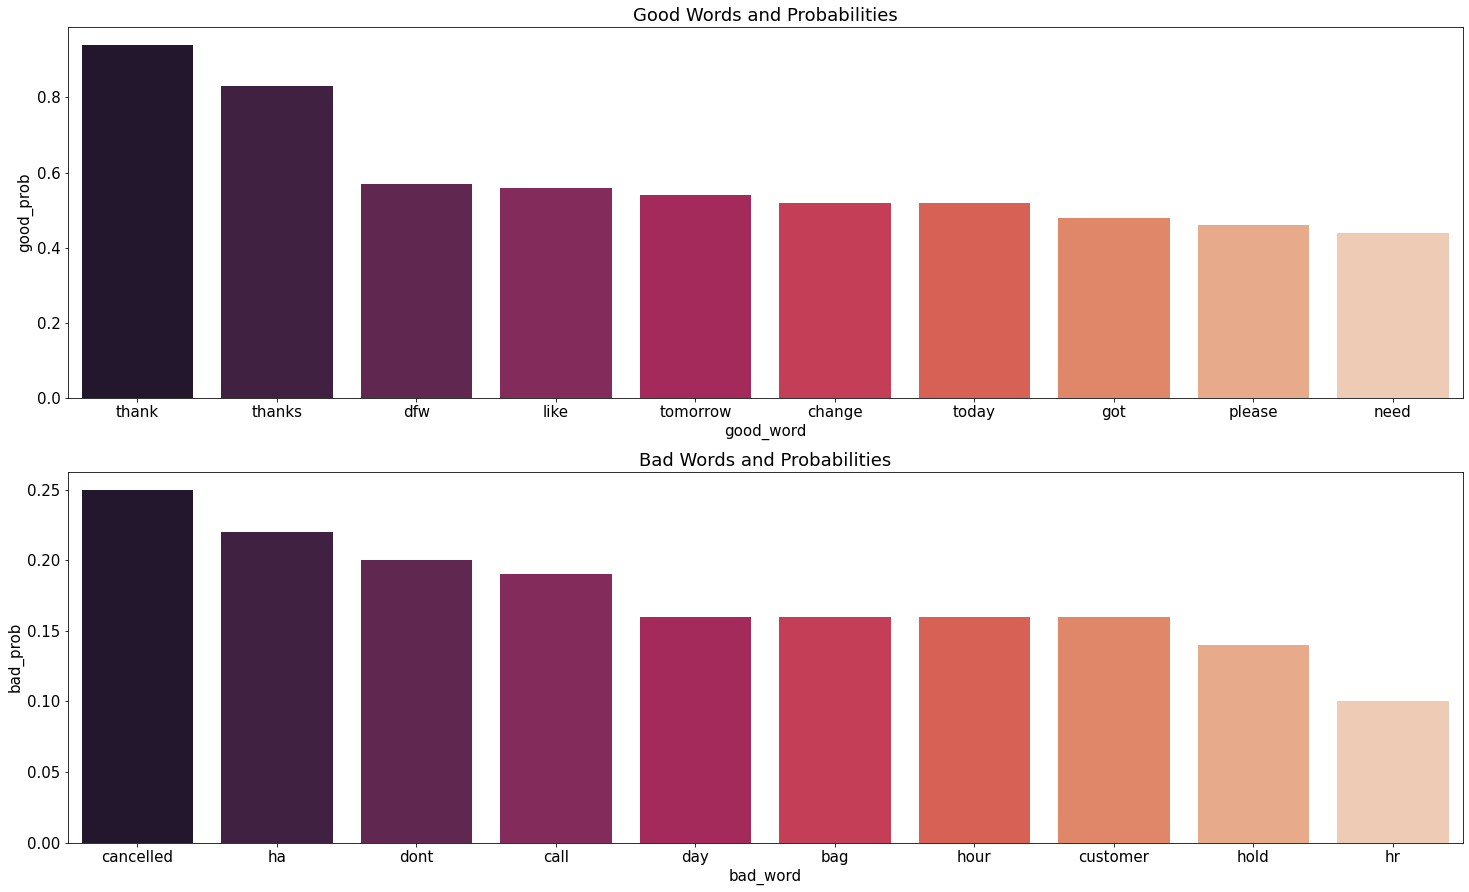

In [42]:
df = tweets.copy()
df = df[df["airline"] == "American"]
#df = tweets.loc[:, 'airline']
bad_good_words(df)

In [98]:
weirdWords = ["dfw"]
getWordContext(weirdWords, "American")

/var/folders/4s/dkl5yc9543jbyd5lrgf388vh0000gp/T/ipykernel_73335/1915454056.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


tweet_id airline_sentiment  airline_sentiment_confidence  \
11897  570305063052283904  negative          1.0000                         
11898  570305051819941889  neutral           1.0000                         
11962  570282469791911936  neutral           1.0000                         
11972  570280225625362432  negative          0.6598                         
11992  570275314036649984  positive          0.6749                         

         negativereason  negativereason_confidence   airline  \
11897  Bad Flight        0.6700                     American   
11898  NaN              NaN                         American   
11962  NaN              NaN                         American   
11972  Cancelled Flight  0.6598                     American   
11992  NaN               0.0000                     American   

      airline_sentiment_gold            name negativereason_gold  \
11897  NaN                    drhavoc         NaN                  
11898  NaN                    Chandrafaythe   NaN                  
11962  NaN                    mrespinosa1971  NaN                  
11972  NaN                    TheVirtualJosh  NaN                  
11992  NaN                    susqhb          NaN                  

       retweet_count  \
11897  0               
11898  0               
11962  0               
11972  0               
11992  0               

                                                                                                                                                     text  \
11897  @americanair thanks for no fresh food on my cross country flight and for making my connection so close No time to eat. TPA-DFW-LAX                   
11898  @AmericanAir my flight got Cancelled Flightled from GRK to DFW, then to LEX for tomorrow and I need it rebooked.                                     
11962  @AmericanAir - keeping AA up in the Air! My crew chief cousin Alex Espinosa in DFW! http://t.co/0HXLNvZknP                                           
11972  @AmericanAir flight 1181 out of Vegas to DFW. Cancelled Flightled Sunday and Monday, no whammie today!                                               
11992  @AmericanAir None of the #LAX flights into #DFW have been Cancelled Flightled. Those landing before and after ours are fine. Completely arbitrary.   

      tweet_coord              tweet_created             tweet_location  \
11897  NaN         2015-02-24 11:31:37 -0800  Tampa Bay                   
11898  NaN         2015-02-24 11:31:34 -0800  NaN                         
11962  NaN         2015-02-24 10:01:50 -0800  Great State of Texas        
11972  NaN         2015-02-24 09:52:55 -0800  NaN                         
11992  NaN         2015-02-24 09:33:24 -0800  Dallas via NYC via the OC   

                    user_timezone  query_match word  
11897  Eastern Time (US & Canada)  True         NaN  
11898  Quito                       True         NaN  
11962  Central Time (US & Canada)  True         NaN  
11972  NaN                         True         NaN  
11992  Central Time (US & Canada)  True         NaN

 - "dfw" means Dallas/Fort Worth
 - "ha" is a part of different word

## Delta

Good Words
               thank 0.95
              thanks 0.93
               fleet 0.80
               fleek 0.65
                 guy 0.64
                 get 0.57
              flight 0.53
                  im 0.52
                 jfk 0.50
             service 0.47
Bad Words
              flight 0.53
                  im 0.52
                 jfk 0.50
             service 0.47
                  wa 0.46
                time 0.42
               plane 0.29
               delay 0.25
             delayed 0.24
                hour 0.17


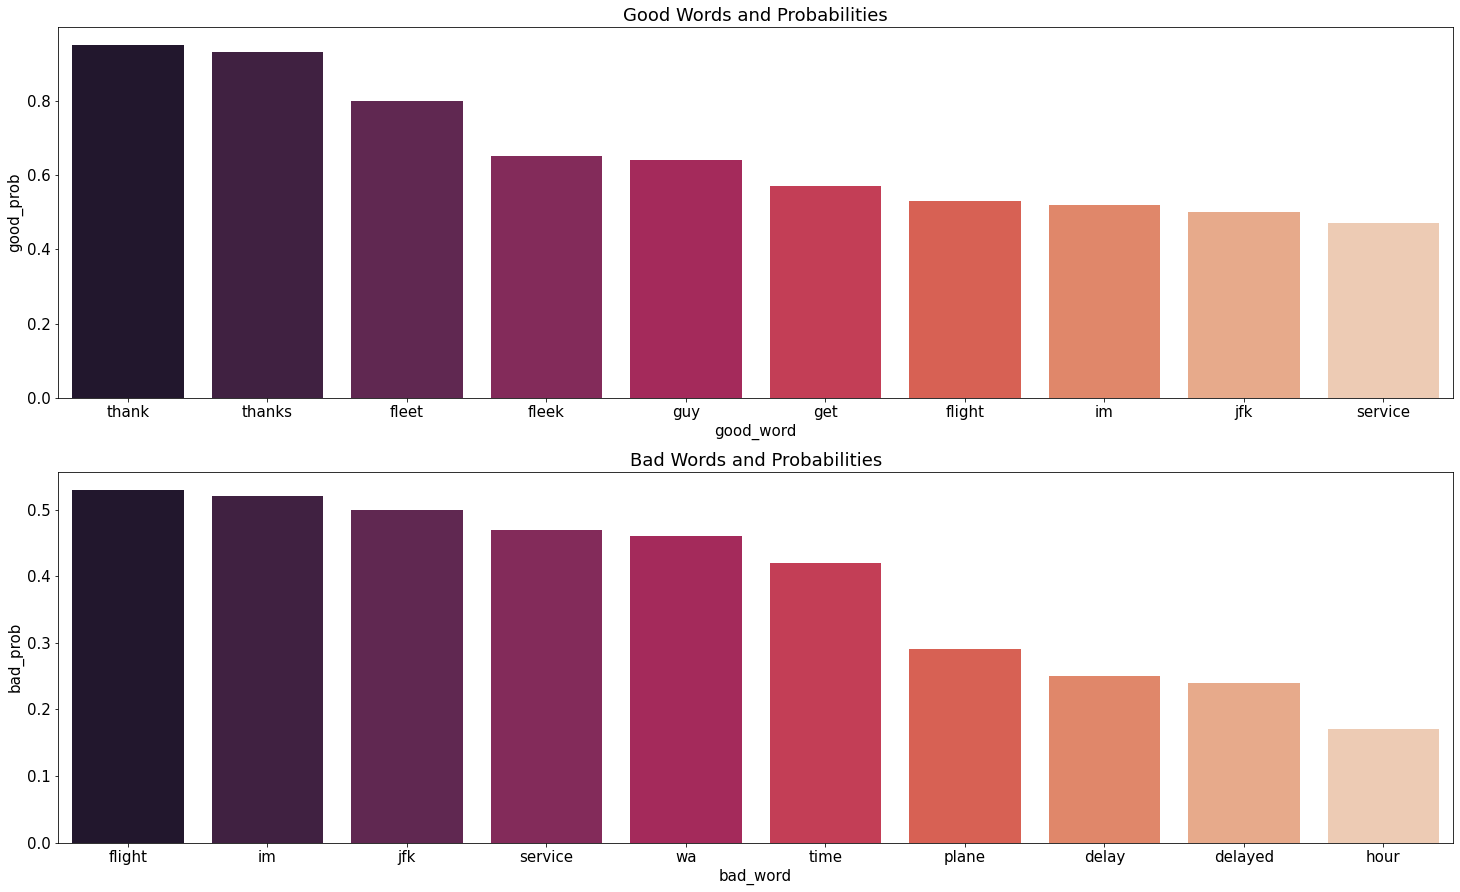

In [44]:
df = tweets.copy()
df = df[df["airline"] == "Delta"]
bad_good_words(df)

In [100]:
weirdWords = ["fleet"]
getWordContext(weirdWords, "Delta")

/var/folders/4s/dkl5yc9543jbyd5lrgf388vh0000gp/T/ipykernel_73335/1915454056.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


tweet_id airline_sentiment  airline_sentiment_confidence  \
6796  570264515285266432  neutral           0.6596                         
6801  570248591295557632  neutral           1.0000                         
6808  570240052279648257  neutral           1.0000                         
6814  570237440616570880  neutral           1.0000                         
6861  570093964059156481  neutral           1.0000                         

     negativereason  negativereason_confidence airline airline_sentiment_gold  \
6796  NaN           NaN                         Delta   NaN                     
6801  NaN           NaN                         Delta   NaN                     
6808  NaN           NaN                         Delta   NaN                     
6814  NaN           NaN                         Delta   NaN                     
6861  NaN           NaN                         Delta   NaN                     

                 name negativereason_gold  retweet_count  \
6796  terrybrokebad    NaN                 0               
6801  butimvikki       NaN                 0               
6808  blckblakelively  NaN                 0               
6814  _blktray         NaN                 0               
6861  BigDdaBasedLord  NaN                 0               

                                                                                                  text  \
6796  @CatfoodBeerGlue you'll enjoy this. \n\n“@JetBlue: Our fleet's on fleek. http://t.co/2thC9RKURT”   
6801  “@JetBlue: Our fleet's on fleek. http://t.co/b5ttno68xu” I just 🙈                                  
6808  Sigh... “@JetBlue: Our fleet's on fleek. http://t.co/W5NL0AY9Bl”                                   
6814  “@JetBlue: Our fleet's on fleek. http://t.co/clu5pdPrHP” :(                                        
6861  RT @JetBlue: Our fleet's on fleek. http://t.co/WEZUMDimYF                                          

     tweet_coord              tweet_created               tweet_location  \
6796  NaN         2015-02-24 08:50:30 -0800  Newcastle, Uk                 
6801  NaN         2015-02-24 07:47:13 -0800  D{M}V                         
6808  NaN         2015-02-24 07:13:17 -0800  where the Bulls/Bears play.   
6814  NaN         2015-02-24 07:02:54 -0800  COMPTON/AZ                    
6861  NaN         2015-02-23 21:32:47 -0800  ClayCo ATL                    

                   user_timezone  query_match   word  
6796  Casablanca                  True         fleet  
6801  Quito                       True         fleet  
6808  Central Time (US & Canada)  True         fleet  
6814  NaN                         True         fleet  
6861  Central Time (US & Canada)  True         fleet

- fleek is slang for something that is good.
- "wa" is part of other words

## Southwest

Good Words
               thank 0.95
              thanks 0.88
  destinationdragons 0.84
           southwest 0.73
              flying 0.72
                 got 0.71
                need 0.70
                know 0.69
               today 0.69
           flightled 0.67
Bad Words
                cant 0.48
                 day 0.44
               plane 0.44
                 one 0.44
            customer 0.42
               phone 0.34
           cancelled 0.32
                hour 0.22
                 bag 0.20
                hold 0.16


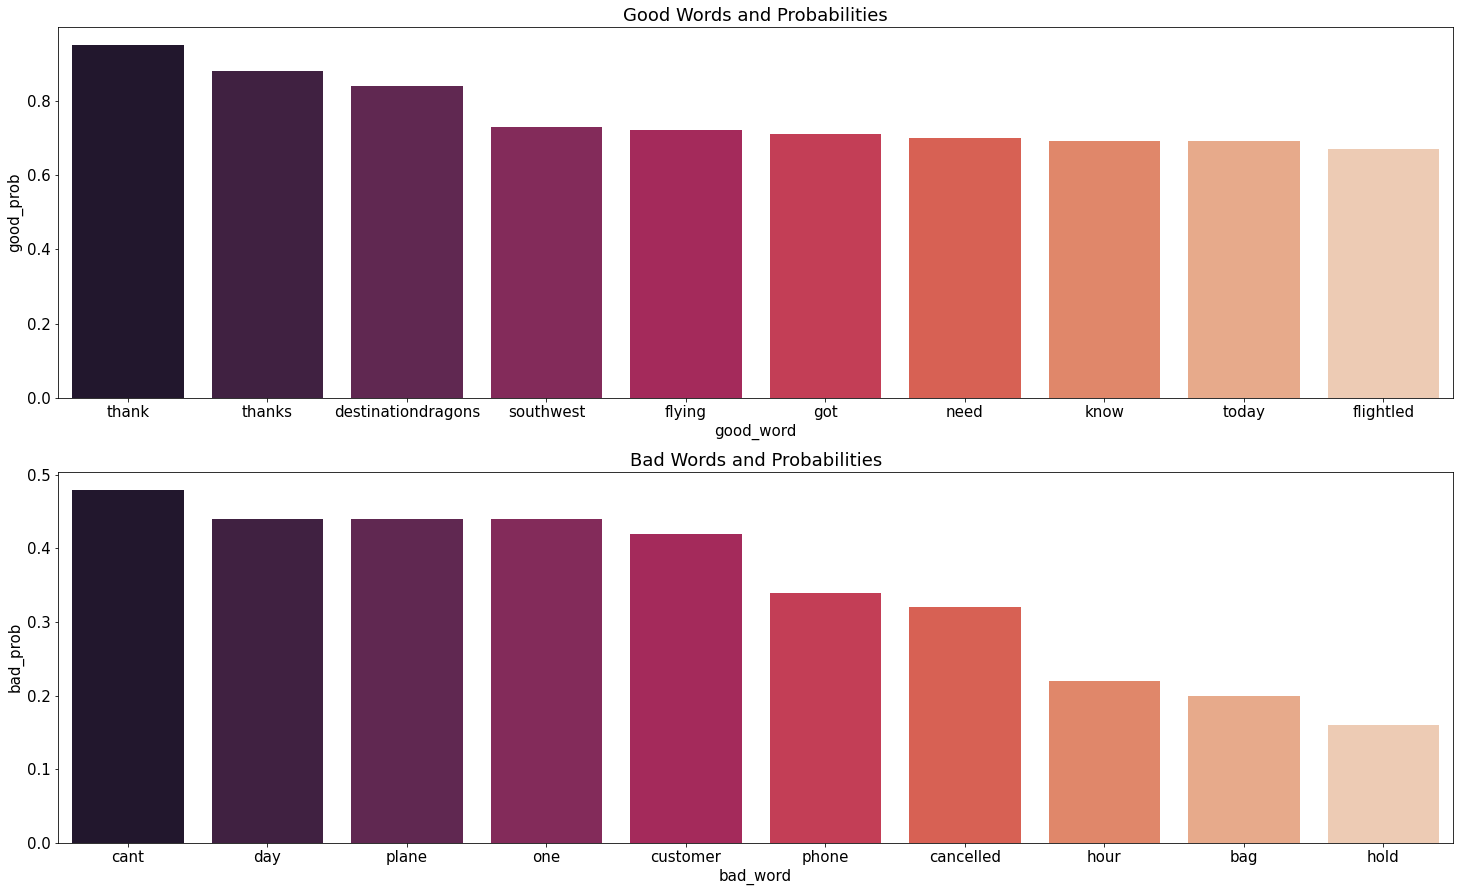

In [46]:
df = tweets.copy()
df = df[df["airline"] == "Southwest"]
bad_good_words(df)

In [101]:
weirdWords = ["destinationdragons"]
getWordContext(weirdWords, "Southwest")

/var/folders/4s/dkl5yc9543jbyd5lrgf388vh0000gp/T/ipykernel_73335/1915454056.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


tweet_id airline_sentiment  airline_sentiment_confidence  \
4539  570051666386374657  neutral           0.6273                         
4576  570005561338503170  positive          1.0000                         
4622  569976246135697408  neutral           0.6804                         
4648  569961503308189696  positive          0.3476                         
4785  569767473525862400  neutral           0.6922                         

     negativereason  negativereason_confidence    airline  \
4539  NaN           NaN                         Southwest   
4576  NaN           NaN                         Southwest   
4622  NaN           NaN                         Southwest   
4648  NaN            0.0                        Southwest   
4785  NaN           NaN                         Southwest   

     airline_sentiment_gold            name negativereason_gold  \
4539  NaN                    delshaffer      NaN                  
4576  NaN                    m_panda_bear    NaN                  
4622  NaN                    itsangieohyeah  NaN                  
4648  NaN                    MsGeekyTeach    NaN                  
4785  NaN                    Immafun12       NaN                  

      retweet_count  \
4539  0               
4576  0               
4622  0               
4648  0               
4785  0               

                                                                                                                                              text  \
4539  See you in ATL! “@SouthwestAir: Congrats to our #DestinationDragons winners! Ready, Atlanta? http://t.co/AY1GIdcfa4 http://t.co/yC7V2s0iOd”    
4576  @SouthwestAir Thank you Thank you Thank you!!! My last attempt to win #DestinationDragons tickets was a success! I could not be happier!! :)   
4622  “@SouthwestAir: Congrats to these fans who are seeing #DestinationDragons in L.A.! SLC, you're next! http://t.co/YcCITaeP3S” Thanks again SW   
4648  @SouthwestAir Just go ahead and start the scavenger hunt after 5 pm today when work is over ;) #DestinationDragons                             
4785  @SouthwestAir #DestinationDragons @Imaginedragons Scavenger Hunt Vegas, BE READY!!! http://t.co/vHgkiTzSaw                                     

     tweet_coord              tweet_created               tweet_location  \
4539  NaN         2015-02-23 18:44:42 -0800  Charleston, SC                
4576  NaN         2015-02-23 15:41:30 -0800  + Las Vegas +                 
4622  NaN         2015-02-23 13:45:01 -0800  Dodger Stadium | Disneyland   
4648  NaN         2015-02-23 12:46:26 -0800  Las Vegas                     
4785  NaN         2015-02-22 23:55:26 -0800  Oregon                        

                   user_timezone  query_match word  
4539  Eastern Time (US & Canada)  True         NaN  
4576  NaN                         True         NaN  
4622  Pacific Time (US & Canada)  True         NaN  
4648  Arizona                     True         NaN  
4785  Alaska                      True         NaN

## US Airways

Good Words
               thank 0.83
              thanks 0.74
              change 0.57
              please 0.56
                 amp 0.51
                 phl 0.51
         reservation 0.48
             weather 0.46
                 got 0.46
           flightled 0.42
Bad Words
              minute 0.17
                late 0.17
                  hr 0.16
                 day 0.15
           cancelled 0.14
               never 0.11
             delayed 0.11
               delay 0.08
                 min 0.06
                hour 0.06


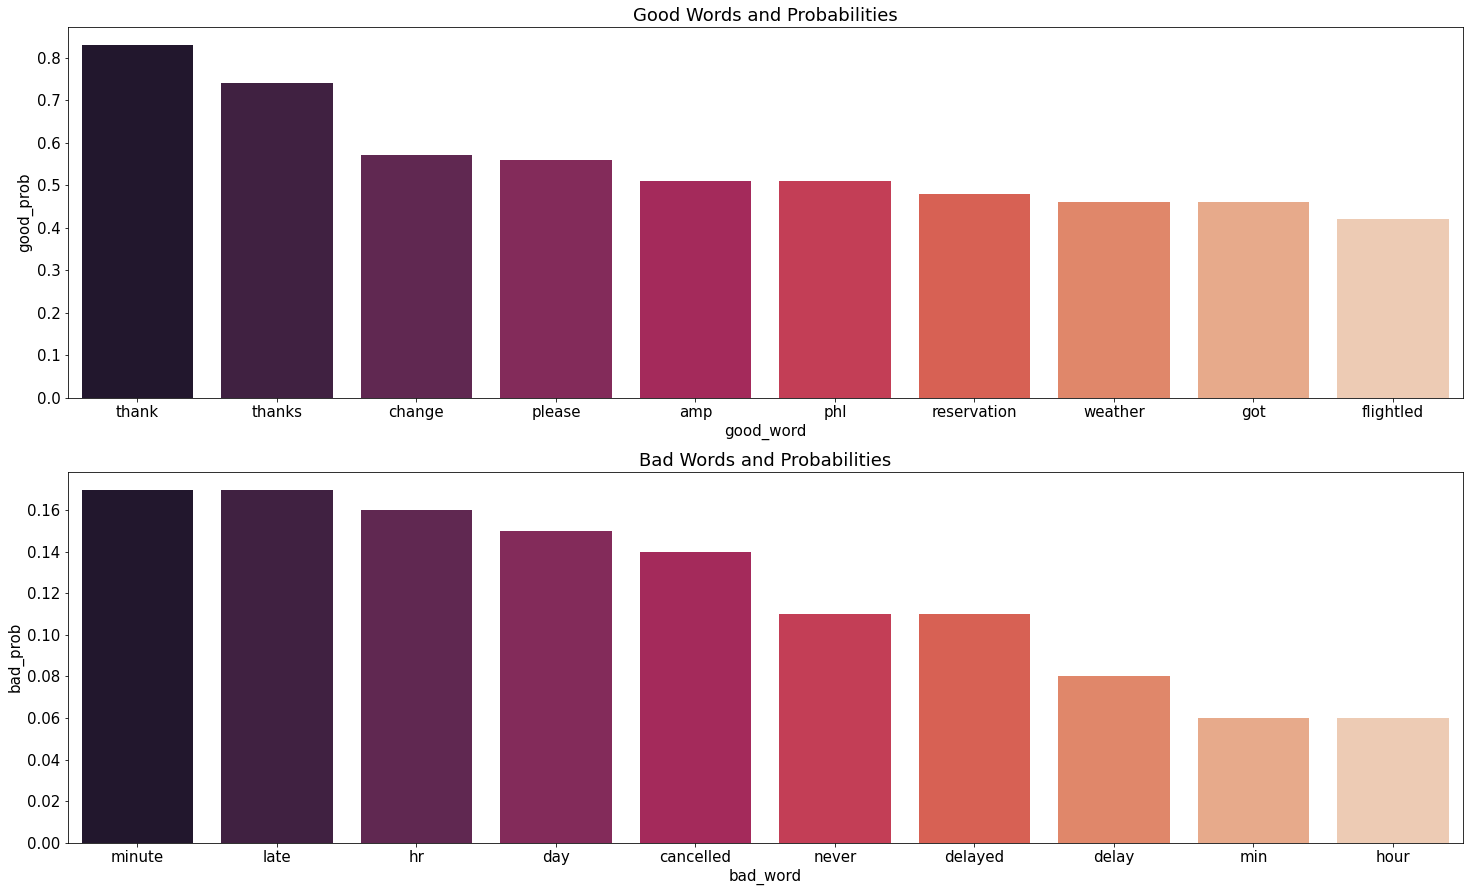

In [48]:
df = tweets.copy()
df = df[df["airline"] == "US Airways"]
bad_good_words(df)

In [103]:
weirdWords = [ "phl"]
getWordContext(weirdWords, "US Airways")

/var/folders/4s/dkl5yc9543jbyd5lrgf388vh0000gp/T/ipykernel_73335/1915454056.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


tweet_id airline_sentiment  airline_sentiment_confidence  \
9036  570274417546113025  neutral           0.7002                         
9057  570262977947013120  neutral           1.0000                         
9077  570245576815546368  negative          1.0000                         
9081  570242191685234688  negative          0.6316                         
9126  570197883716300800  negative          1.0000                         

                   negativereason  negativereason_confidence     airline  \
9036  NaN                          0.0000                     US Airways   
9057  NaN                         NaN                         US Airways   
9077  Customer Service Issue       0.6897                     US Airways   
9081  Can't Tell                   0.3263                     US Airways   
9126  Flight Attendant Complaints  0.6875                     US Airways   

     airline_sentiment_gold           name negativereason_gold  retweet_count  \
9036  NaN                    tuneday        NaN                 0               
9057  NaN                    itsandrewhorn  NaN                 0               
9077  NaN                    bergie72       NaN                 0               
9081  NaN                    _Justin22_     NaN                 0               
9126  NaN                    suetrio        NaN                 0               

                                                                                                                                              text  \
9036  @USAirways I left my personal stuff on US4551 from PHL-BOS about an hour ago. Went baggage, was told plane left to call 800#                   
9057  @USAirways can I check bags through to my final destination even though I bought separate tickets from IAD to PHL  and PHL to Israel?          
9077  @USAirways your CSR in PHL suck.   Flt 3883 gets cx'd,  i get rebooked to the next day?  On standby for 4011. Not hopeful.                     
9081  @USAirways You should be prepared for Weather. All I want to do is find out if I can take train to PHL to catch my connection.                 
9126  @USAirways Flight 830 CLT to Phl. I was 1st on list.Someone else got spot. Rude employee in coach. Wouldt give ID. Said he was cute red head   

     tweet_coord              tweet_created    tweet_location  \
9036  NaN         2015-02-24 09:29:50 -0800  Philadelphia, PA   
9057  NaN         2015-02-24 08:44:23 -0800  Brooklyn           
9077  NaN         2015-02-24 07:35:14 -0800  Hanover Twp, PA    
9081  NaN         2015-02-24 07:21:47 -0800  NaN                
9126  NaN         2015-02-24 04:25:43 -0800  NaN                

                   user_timezone  query_match word  
9036  NaN                         True         NaN  
9057  Eastern Time (US & Canada)  True         NaN  
9077  NaN                         True         NaN  
9081  Eastern Time (US & Canada)  True         NaN  
9126  NaN                         True         NaN

- "phl" stands for Philadelphia

- amp a sign for the word and (&)

## Virgin America

Good Words
                love 0.96
              thanks 0.96
                take 0.93
              second 0.93
                 new 0.92
               oscar 0.92
               great 0.92
              austin 0.92
              flying 0.91
                  lt 0.91
Bad Words
                 sad 0.54
            customer 0.54
                week 0.54
           cancelled 0.53
               never 0.52
             luggage 0.51
                seat 0.48
             nothing 0.46
             website 0.41
                site 0.40


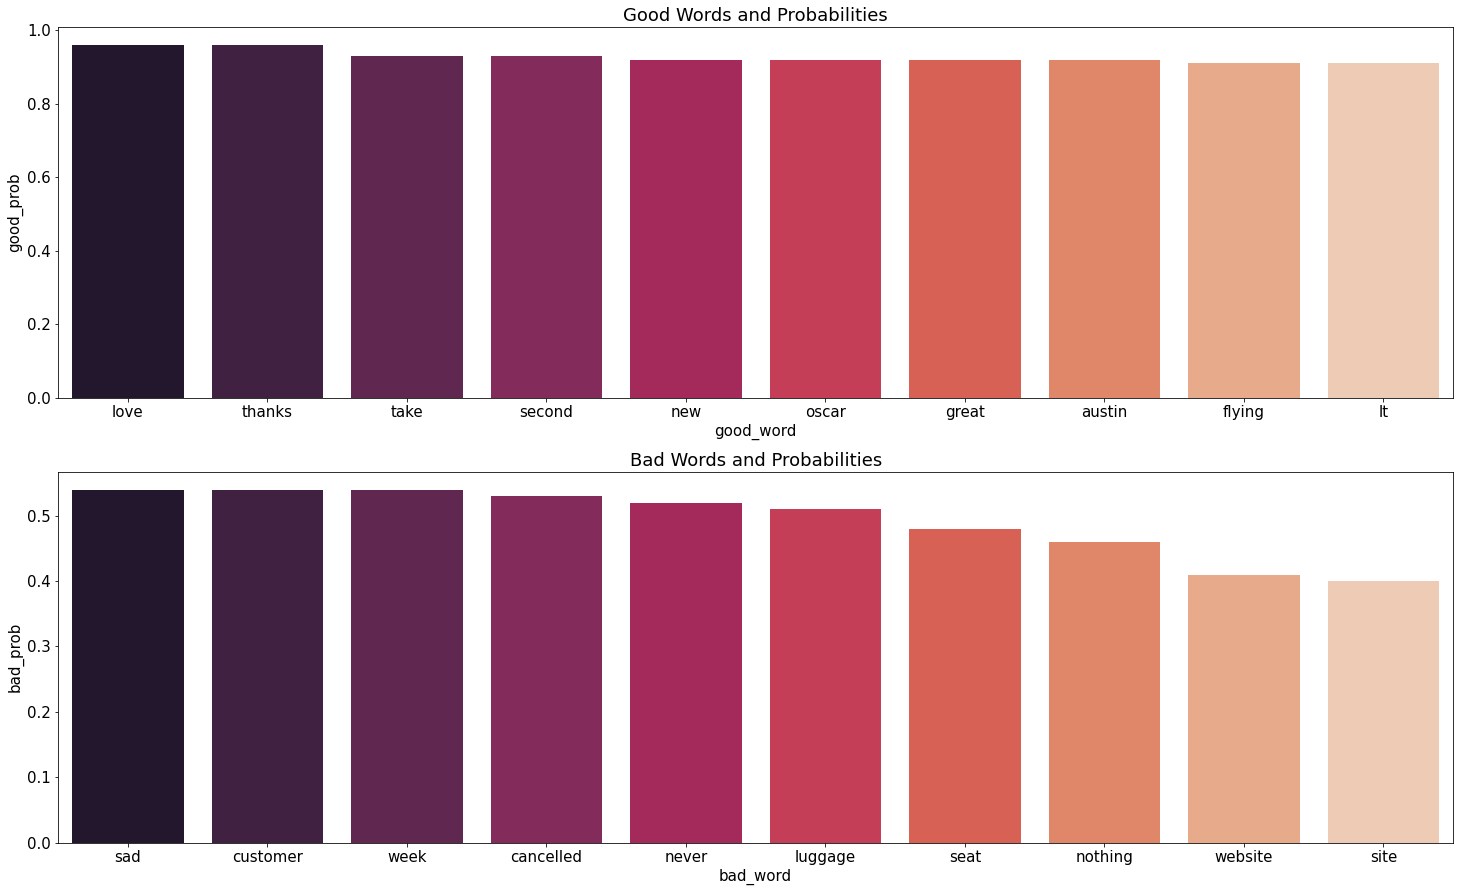

In [50]:
df = tweets.copy()
df = df[df["airline"] == "Virgin America"]
bad_good_words(df, min_df=5)

In [104]:
weirdWords = [ "second"]
getWordContext(weirdWords, "Virgin America")

/var/folders/4s/dkl5yc9543jbyd5lrgf388vh0000gp/T/ipykernel_73335/1915454056.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


tweet_id airline_sentiment  airline_sentiment_confidence  \
10   570294189143031808  neutral           0.6769                         
291  568845553104068609  neutral           1.0000                         
296  568833739192557569  neutral           1.0000                         
356  568495808053702656  neutral           1.0000                         
375  568451468560187393  positive          0.6395                         

    negativereason  negativereason_confidence         airline  \
10   NaN            0.0                        Virgin America   
291  NaN           NaN                         Virgin America   
296  NaN           NaN                         Virgin America   
356  NaN           NaN                         Virgin America   
375  NaN           NaN                         Virgin America   

    airline_sentiment_gold             name negativereason_gold  \
10   NaN                    idk_but_youtube  NaN                  
291  NaN                    AirlineFuel      NaN                  
296  NaN                    JetBlueNews      NaN                  
356  NaN                    LondonBrushCo    NaN                  
375  NaN                    EricLMitchell    NaN                  

     retweet_count  \
10   0               
291  0               
296  0               
356  0               
375  0               

                                                                                                                                                            text  \
10   @VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24                                                               
291  @VirginAmerica posts second consecutive full-year net profit - @ATWOnline http://t.co/tvB5zbzVhg                                                              
296  @VirginAmerica achieves a second year of profitability despite revenue pressure ... - @CAPA_Aviation http://t.co/zSuZTNAIJq                                   
356  @virginamerica.. Can you help? Left my blazer in. Kooples jacket bag at 3rd row second seat from right gate 36 T3 lax.. Flight to sfo                         
375  @VirginAmerica  Flight Booking Problems last second flight for next week from SFO- to SAN any chance you want to gift me a promo code since I love you guys   

    tweet_coord              tweet_created   tweet_location  \
10   NaN         2015-02-24 10:48:24 -0800  1/1 loner squad   
291  NaN         2015-02-20 10:52:03 -0800  Global            
296  NaN         2015-02-20 10:05:06 -0800  USA               
356  NaN         2015-02-19 11:42:17 -0800  Global            
375  NaN         2015-02-19 08:46:06 -0800  San Francisco     

                  user_timezone  query_match    word  
10   Eastern Time (US & Canada)  True         second  
291  Sydney                      True         second  
296  Sydney                      True         second  
356  Pacific Time (US & Canada)  True         second  
375  Pacific Time (US & Canada)  True         second

- lt is part of bigger words like "fault", "multiple", and &lt; (<)

# Lime

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
import lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer

df = tweets.copy()
df = df[df["airline_sentiment"] != "neutral"]
df["text"] = df["text"].astype(str)

list_corpus = df["text"].tolist()
list_labels = df["airline_sentiment"].tolist()
X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=40)
vectorizer = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}', ngram_range=(1, 2), stop_words = 'english', binary=True)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

logreg = LogisticRegression(C=1, max_iter=1000)
logreg.fit(train_vectors, y_train)
pred = logreg.predict(test_vectors)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.901, precision = 0.897, recall = 0.901, f1 = 0.897


In [53]:
c = make_pipeline(vectorizer, logreg)
class_names=list(df.airline_sentiment.unique())
explainer = LimeTextExplainer(class_names=class_names)

idx = 187
exp = explainer.explain_instance(X_test[idx], c.predict_proba, num_features=6, labels=[1])
print('Document id: %d' % idx)
#print('Predicted class =', class_names[logreg.predict(test_vectors[idx].reshape(1,-1))])
#print('True class: %s' % class_names[y_test[idx]])

Document id: 187


In [54]:
#.reshape(1,-1)[0,0]]

In [55]:
#negative sentiment 
print ('Explanation for class %s' % class_names[1])
print ('\n'.join(map(str, exp.as_list(label=1))))

Explanation for class negative
('thanks', 0.5584692058670742)
('helpful', 0.084036902252592)
('ask', -0.07004153052849353)
('jfk', -0.0505127470213885)
('incredibly', -0.04804099281541969)
('jetblue', 0.038739026585601084)


In [56]:
#positive sentiment
print ('Explanation for class %s' % class_names[0])
print ('\n'.join(map(str, exp.as_list(label=1))))

Explanation for class positive
('thanks', 0.5584692058670742)
('helpful', 0.084036902252592)
('ask', -0.07004153052849353)
('jfk', -0.0505127470213885)
('incredibly', -0.04804099281541969)
('jetblue', 0.038739026585601084)


In [57]:
exp = explainer.explain_instance(X_test[idx], c.predict_proba, num_features=6, top_labels=2)
print(exp.available_labels())

[1, 0]


In [58]:
exp.show_in_notebook(text=False)

It's predicting that most of the tweets are negative (90%). 

In [59]:
exp.show_in_notebook(text=y_test[idx], labels=(1,))

I zoomed in and study the explanations for class negative as well as the document itself.

### Let's look at the negative reason

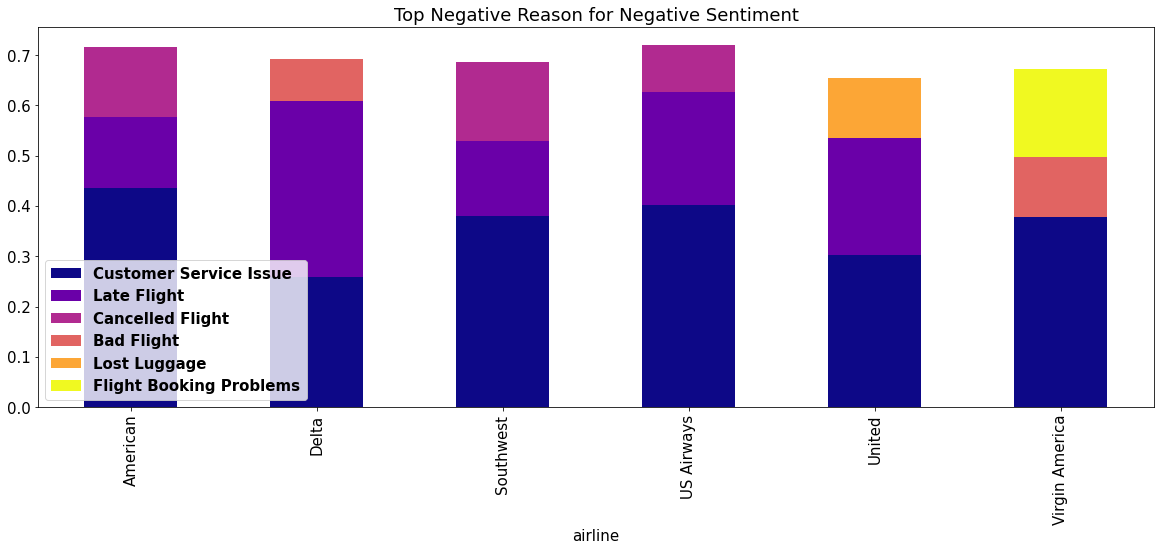

In [115]:
plt.rcParams["figure.figsize"] = (20,7)
plt.rcParams.update({'font.size': 15})

#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


top = tweets[tweets["negativereason"] != "Can't Tell"]
top = top.groupby("airline")["negativereason"].value_counts(normalize=True).to_frame()
top = top.dropna(how='any')

top = top.groupby('airline')['negativereason'].head(3)
top.unstack('negativereason').plot.bar(stacked=True, cmap="plasma")

plt.title("Top Negative Reason for Negative Sentiment")

#plt.legend(loc="upper left")
legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties, loc="lower left")

plt.show()

In [66]:
import re
#s='abcd2343 abw34324 abc3243-23A'
#re.split('(\d+)',s)

df = tweets[tweets["negativereason"] != "Can't Tell"]
df = df.groupby('airline')['negativereason'].value_counts().to_frame()
df = df.groupby('airline')['negativereason'].head()

#df = df.to_frame()
type(df)
#df = df.reset_index(drop=False)
df

airline         negativereason             
American        Customer Service Issue         768
                Late Flight                    249
                Cancelled Flight               246
                Lost Luggage                   149
                Flight Booking Problems        130
Delta           Late Flight                    269
                Customer Service Issue         199
                Bad Flight                     64 
                Flight Attendant Complaints    60 
                Lost Luggage                   57 
Southwest       Customer Service Issue         391
                Cancelled Flight               162
                Late Flight                    152
                Bad Flight                     90 
                Lost Luggage                   90 
US Airways      Customer Service Issue         811
                Late Flight                    453
                Cancelled Flight               189
                Lost Luggage          

Text(0.5, 1.0, 'Negative Reason for Negative Sentiment')

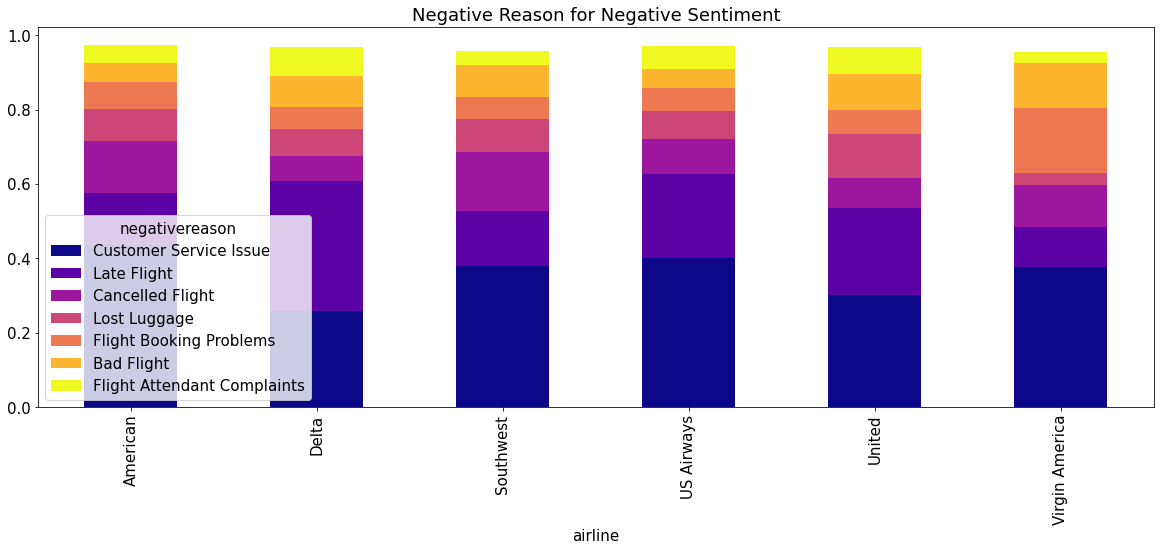

In [160]:
df = tweets[tweets["negativereason"] != "Can't Tell"]
df = df[["airline", "negativereason"]]
df = df.dropna(how='any')

df = df.groupby(['airline']).negativereason.value_counts(normalize=True).to_frame()
df = df.groupby('airline')['negativereason'].head(7)
df.unstack('negativereason').plot.bar(stacked=True, cmap="plasma")


plt.title("Negative Reason for Negative Sentiment")

### Date vs Airline Sentiment <a class="anchor" id="Date"></a>

In [68]:
from datetime import datetime

#convert tweet created column to datetime
tweets["tweet_created"] = pd.to_datetime(tweets["tweet_created"])

#drop timestmp 
tweets["tweet_created"] = tweets["tweet_created"].dt.date

#tweets.head(3)

# group by date , airline, and airline sentiment 
tweetGroup = tweets.groupby(["tweet_created", "airline", "airline_sentiment"]).size()
tweetGroup

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative             1  
                               neutral              1  
               United          negative             2  
2015-02-17     Delta           negative             108
                               neutral              86 
                                                    .. 
2015-02-24     United          neutral              49 
                               positive             25 
               Virgin America  negative             10 
                               neutral              6  
                               positive             13 
Length: 136, dtype: int64

The tweets are between Feb. 16, 2015 and Feb 24, 2015

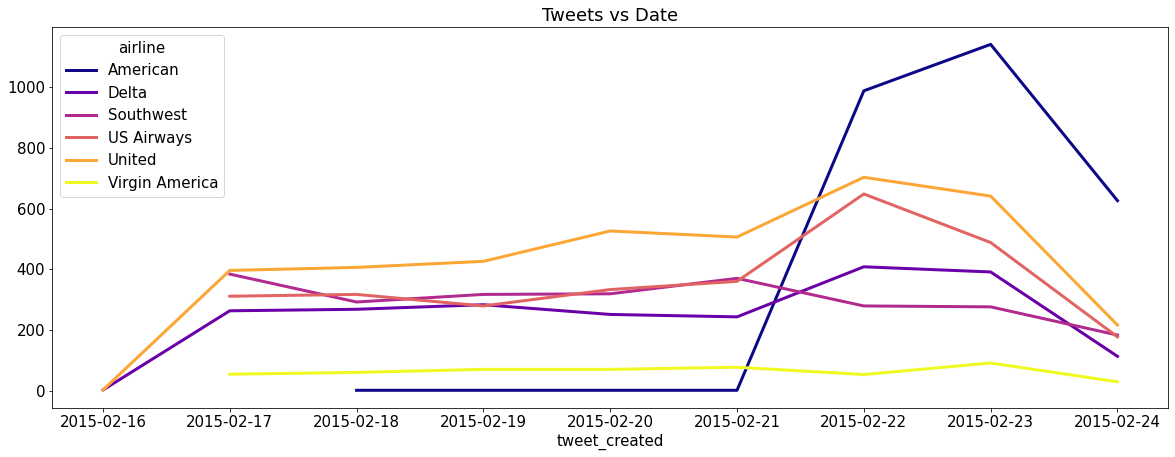

In [69]:
# All tweets per date
#fig, axes = plt.subplots(figsize=(15, 5))

allTweets = tweets.groupby(["tweet_created", "airline"])["tweet_id"].count()
allTweets.unstack().plot(cmap="plasma", linewidth=3)

plt.title("Tweets vs Date")
plt.show()

In [70]:
negTweets = tweets[tweets["airline_sentiment"] == 'negative']

dailySum = negTweets.groupby("tweet_created")["tweet_id"].count()
#daily =  
dailySum

tweet_created
2015-02-16    3   
2015-02-17    838 
2015-02-18    736 
2015-02-19    751 
2015-02-20    835 
2015-02-21    1049
2015-02-22    2266
2015-02-23    1919
2015-02-24    781 
Name: tweet_id, dtype: int64

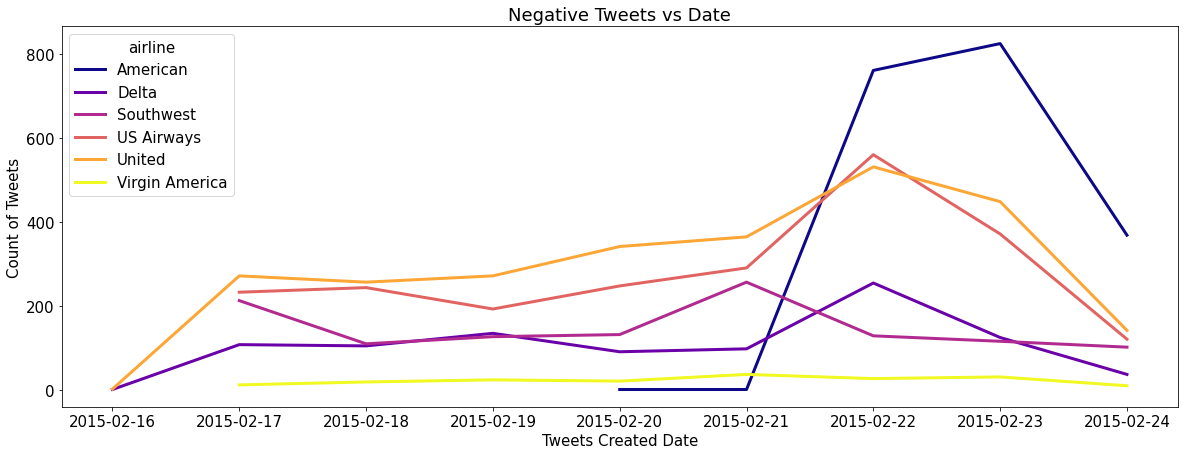

In [71]:
### NEGATIVE TWEETS VS DATE ###
import matplotlib.ticker as mtick


negTweets = tweets[tweets["airline_sentiment"] == 'negative']
negTweets = negTweets.groupby(["tweet_created", "airline"])["tweet_id"].count()
negTweets.unstack().plot(cmap="plasma", linewidth=3)

plt.title("Negative Tweets vs Date")
plt.xlabel("Tweets Created Date")
plt.ylabel("Count of Tweets")

plt.show()

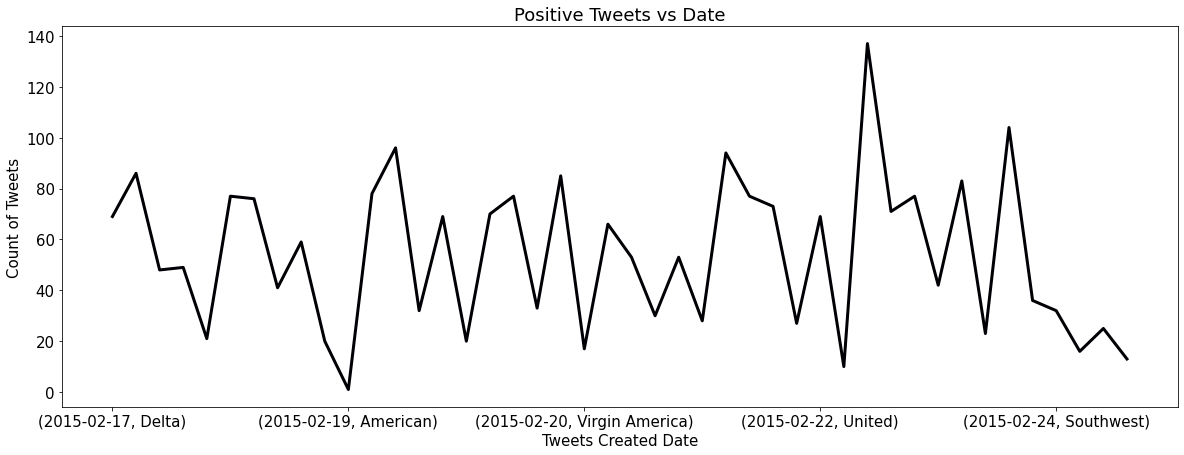

In [72]:
# Positive tweets per date

posTweets = tweets[tweets["airline_sentiment"] == 'positive']

posTweets = posTweets.groupby(["tweet_created", "airline"])["tweet_id"].count()
#posTweets = posTweets.groupby(["tweet_created", "airline"])["tweet_id"].value_counts(normalize=True)
posTweets.plot(cmap="magma", linewidth=3)

plt.title("Positive Tweets vs Date")
plt.xlabel("Tweets Created Date")
plt.ylabel("Count of Tweets")
plt.show()

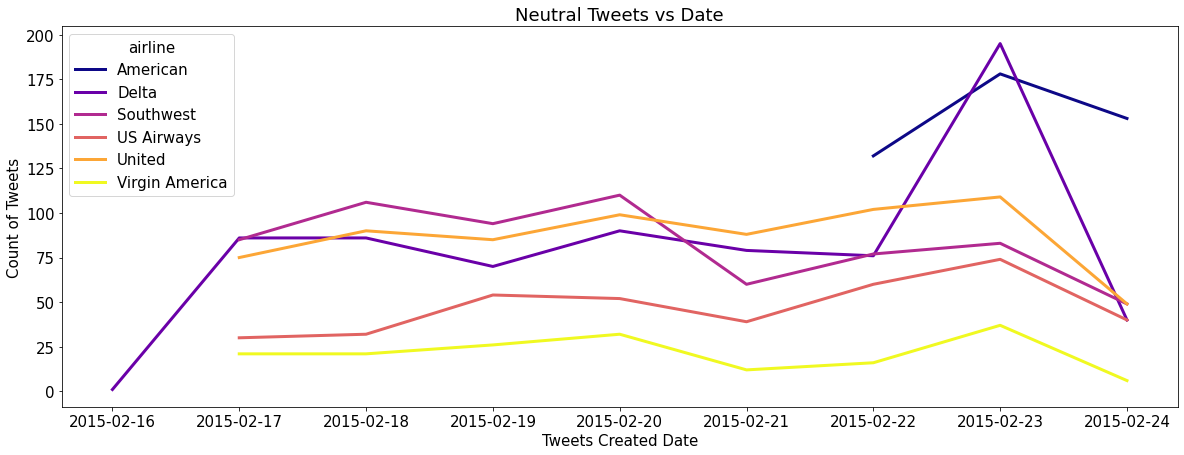

In [73]:
# Neutral tweets per date

neuTweets = tweets[tweets["airline_sentiment"] == 'neutral']

neuTweets = neuTweets.groupby(["tweet_created", "airline"])["tweet_id"].count()
neuTweets.unstack().plot(cmap="plasma", linewidth=3)

plt.title("Neutral Tweets vs Date")
plt.xlabel("Tweets Created Date")
plt.ylabel("Count of Tweets")
plt.show()


## user_timezone  <a class="anchor" id="user_timezone"></a>

In [74]:
#number of timezones 
tweets.user_timezone.nunique()

85

In [75]:
topTZ = tweets.user_timezone.value_counts().head(10)
topTZ = topTZ.to_frame()
topTZ = topTZ.reset_index()
topTZ = topTZ.rename(columns={"index": "Timezone", "user_timezone": "Count"})
topTZ.head()

Timezone  Count
0  Eastern Time (US & Canada)  3744 
1  Central Time (US & Canada)  1931 
2  Pacific Time (US & Canada)  1208 
3  Quito                       738  
4  Atlantic Time (Canada)      497

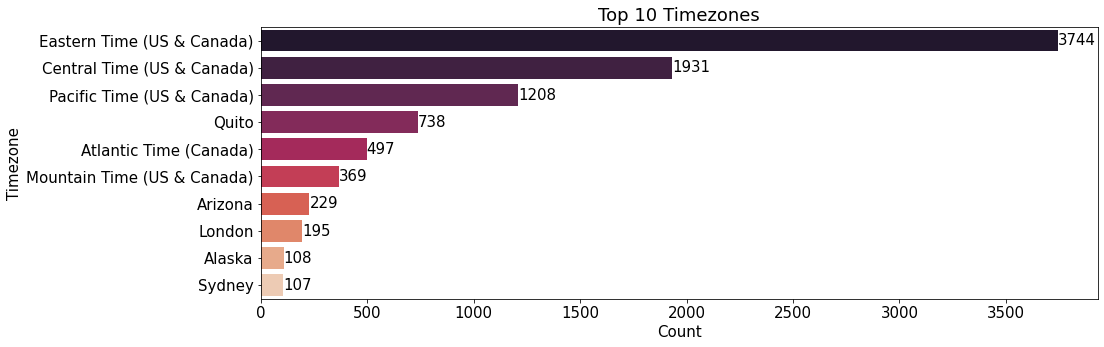

In [76]:
fig, axes = plt.subplots(figsize=(15, 5))
axes = sns.barplot(y = "Timezone", x="Count", data=topTZ, palette="rocket")
plt.title("Top 10 Timezones")

#plt.xticks(rotation=90)

for container in axes.containers:
    axes.bar_label(container)

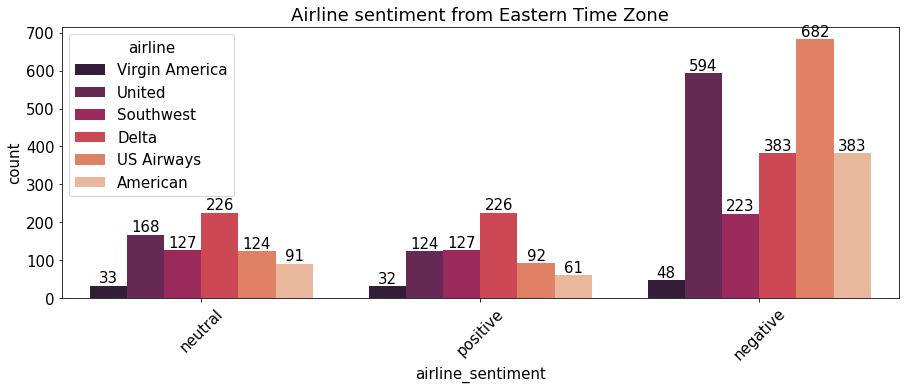

In [77]:
eastTZ = tweets[tweets["user_timezone"] == "Eastern Time (US & Canada)"]

fig, axes = plt.subplots(figsize=(15, 5))
axes = sns.countplot(x = "airline_sentiment", hue="airline", data=eastTZ, palette="rocket")
plt.title("Airline sentiment from Eastern Time Zone")

plt.xticks(rotation=45)

for container in axes.containers:
    axes.bar_label(container)

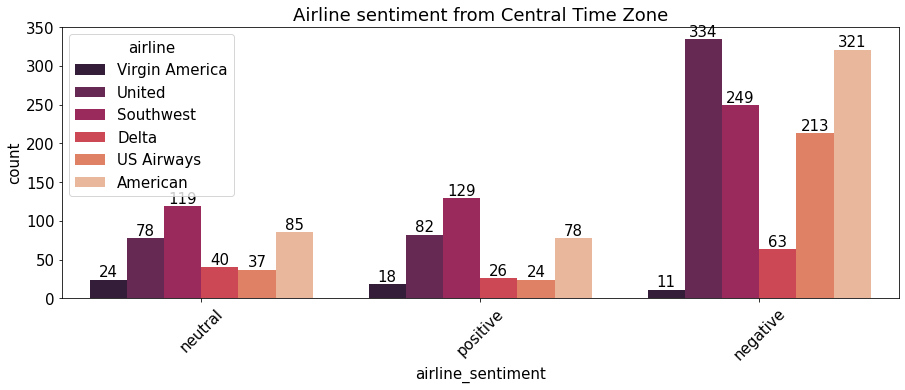

In [78]:
centralTZ = tweets[tweets["user_timezone"] == "Central Time (US & Canada)"]

fig, axes = plt.subplots(figsize=(15, 5))
axes = sns.countplot(x = "airline_sentiment", hue="airline", data=centralTZ, palette="rocket")
plt.title("Airline sentiment from Central Time Zone")

plt.xticks(rotation=45)

for container in axes.containers:
    axes.bar_label(container)

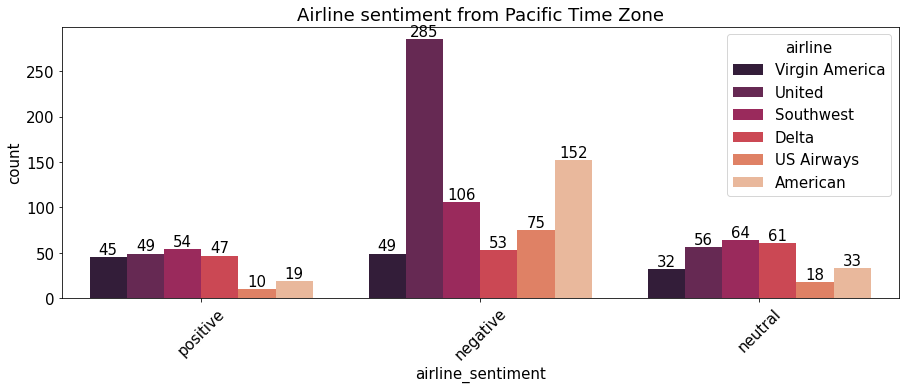

In [79]:
pacificTZ = tweets[tweets["user_timezone"] == "Pacific Time (US & Canada)"]

fig, axes = plt.subplots(figsize=(15, 5))
axes = sns.countplot(x = "airline_sentiment", hue="airline", data=pacificTZ, palette="rocket")
plt.title("Airline sentiment from Pacific Time Zone")

plt.xticks(rotation=45)

for container in axes.containers:
    axes.bar_label(container)

# Conclusion <a class="anchor" id="Conclusion"></a>

Tracking a sentiment analysis is a way that companies can see what their customers think about their company.

Most of the the sentiment are negative.

#### Reasons for negative sentiment

Delta, American, US Airways, and United top complaints are customer service issue and late flight.

Virgin America top complaints are customer service issues and flight booking problems. 

Southwest top complaints are customer service issues and cancelled flights.